# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aqu√≠](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. M√°s informaci√≥n sobre el dataset [aqu√≠](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploraci√≥n de datos y Procesamiento del Lenguaje Natural

Ded√≠cale un buen tiempo a hacer un An√°lisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, ser√° dif√≠cil completar este an√°lisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¬øqu√© palabras est√°n asociadas a calificaciones positivas y qu√© palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la cr√≠tica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¬øes un problema de Clasificaci√≥n o de Regresi√≥n?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Eval√∫a de forma apropiada sus resultados. Justifica la m√©trica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperpar√°metros de tu modelo.
1. Intenta responder la pregunta: ¬øQu√© informaci√≥n est√° usando el modelo para predecir?

**Recomendaci√≥n:** si no te resulta conveniente trabajar en espa√±ol con NLTK, te recomendamos que explores la librer√≠a [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¬øValdr√° la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar √∫nicamente las etiquetas Positiva y Negativa a cada cr√≠tica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qu√© situaci√≥n puede ser √∫til. ¬øEsperas que el desempe√±o sea mejor o peor?
1. ¬øHay algo que te gustar√≠a investigar o probar?

### **¬°T√≥mate tiempo para investigar y leer mucho!**

---------

# 1. An√°lisis Exploratorio de Datos

## 1.1 Librer√≠as y bases de datos

Importamos las librer√≠as requeridas para el desarrollo del proyecto.

In [4]:
import pandas as pd
import numpy as np 
import prettytable as pt
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Importamos la librer√≠a Natural Language Tokenizer
import nltk

#Diccionario de stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('spanish'))
#Palabras que vamos a mantener en el dataset
stopwords.remove('no')
stopwords.remove('pero')

In [6]:
# M√©trica de Evaluaci√≥n
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Modelos de optimizaci√≥n
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

# Modelos de machine learning
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron 
from sklearn.linear_model import SGDClassifier 

Importamos las bases de datos: *dev*, *test* y *train* de los reviews de productos de amazon.

In [7]:
dev = pd.read_json('dataset_es_dev.json', lines = True)
test = pd.read_json('dataset_es_test.json', lines = True)
train = pd.read_json('dataset_es_train.json', lines = True)
sets = [dev,test,train]

## 1.2 Exploraci√≥n general de los datos

Iniciamos revisando los features y tama√±o de los diferentes sets de datos.

In [7]:
cols = pt.PrettyTable()
cols.add_column('DEV', dev.columns.tolist())
cols.add_column('TEST', test.columns.tolist())
cols.add_column('TRAIN', train.columns.tolist())
print(cols)

+------------------+------------------+------------------+
|       DEV        |       TEST       |      TRAIN       |
+------------------+------------------+------------------+
|    review_id     |    review_id     |    review_id     |
|    product_id    |    product_id    |    product_id    |
|   reviewer_id    |   reviewer_id    |   reviewer_id    |
|      stars       |      stars       |      stars       |
|   review_body    |   review_body    |   review_body    |
|   review_title   |   review_title   |   review_title   |
|     language     |     language     |     language     |
| product_category | product_category | product_category |
+------------------+------------------+------------------+


In [8]:
sizes = pt.PrettyTable()
sizes.add_column('DEV', dev.shape)
sizes.add_column('TEST', test.shape)
sizes.add_column('TRAIN', train.shape)
print(sizes)

+------+------+--------+
| DEV  | TEST | TRAIN  |
+------+------+--------+
| 5000 | 5000 | 200000 |
|  8   |  8   |   8    |
+------+------+--------+


Como observaci√≥n inicial revisamos las primeras 5 instancias del dataset *dev* . Donde observamos los id del producto, reviewer y review, la cantidad de estrellas el t√≠tulo y descripci√≥n del review, el lenguaje y la categor√≠a del producto.

In [9]:
dev.head()

review_id          product_id          reviewer_id  stars  \
0  es_0417480  product_es_0873923  reviewer_es_0672978      1   
1  es_0180432  product_es_0713146  reviewer_es_0100858      1   
2  es_0144850  product_es_0356874  reviewer_es_0486447      1   
3  es_0339629  product_es_0939832  reviewer_es_0894703      1   
4  es_0858362  product_es_0489066  reviewer_es_0887663      1   

                                         review_body  \
0  Malisimo, muy grande demasiado aparatoso y mal...   
1          No he recibido el pedido no la devoluci√≥n   
2  Tengo que buscar otro sistema, este no funcion...   
3  Utilic√© las brocas de menor di√°metro y se me d...   
4         No me gusta su olor a viejo y aspecto malo   

                         review_title language  product_category  
0                         Mala compra       es          wireless  
1                   No lo he recibido       es           apparel  
2  Que no aprieta bien en el manillar       es            sports  
3               Brocas de mantequilla       es  home_improvement  
4                         No me gusta       es            beauty

El feature de lenguaje tiene un √∫nico valor de *es*, indicando el idioma espa√±ol. No se usar√°, as√≠ que se elimina.

In [8]:
print(dev['language'].value_counts(),'\n',train['language'].value_counts(),'\n',test['language'].value_counts())
dev.drop(['language'],axis=1,inplace=True)
train.drop(['language'],axis=1,inplace=True)
test.drop(['language'],axis=1,inplace=True)

es    5000
Name: language, dtype: int64 
 es    200000
Name: language, dtype: int64 
 es    5000
Name: language, dtype: int64


Con el objetivo de tener una idea general de los datasets, de los productos y de los promedios en cantidad de estrellas por set de datos para comparar con los resultados finales del modelo de predicci√≥n, se desarrollan las siguientes gr√°ficas:

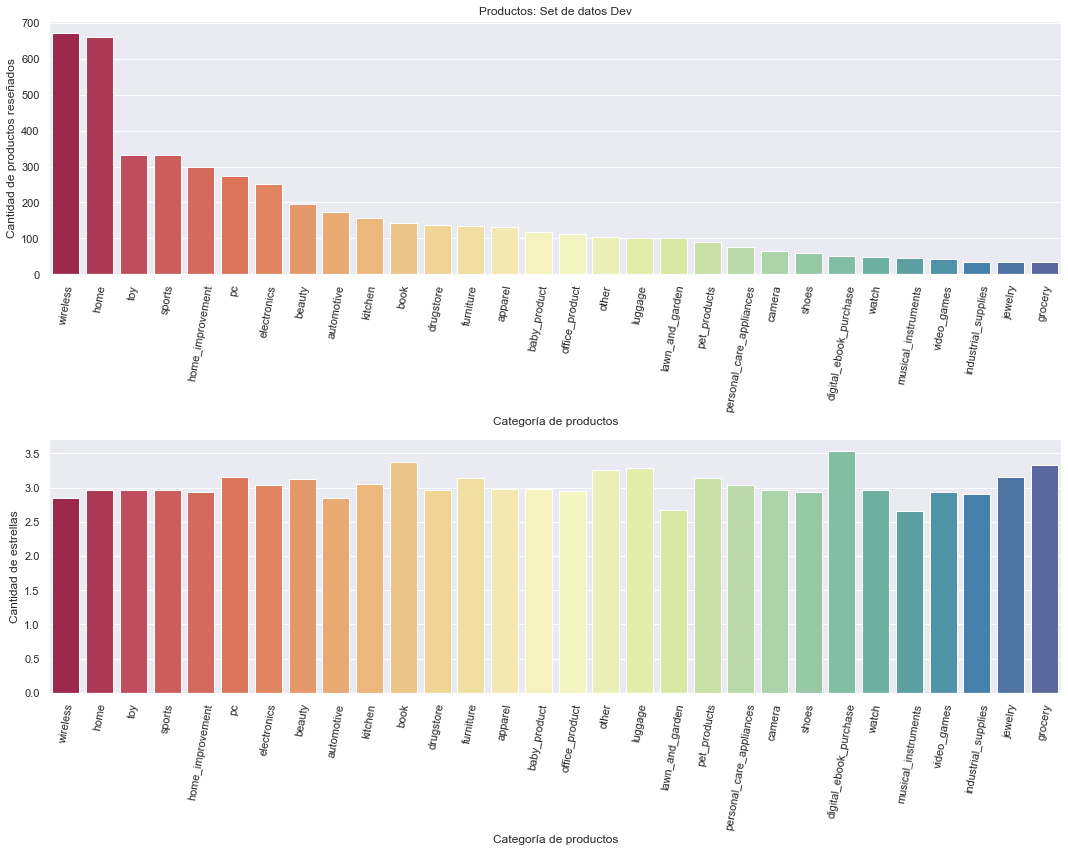

In [11]:
fig, axes = plt.subplots(2,1,figsize=(15, 12))
categoria_producto = dev['product_category'].value_counts();
promedio_estrellas = dev.groupby("product_category", as_index=False).mean()


sns.countplot(ax=axes[0], data=dev, x='product_category', palette="Spectral", order=categoria_producto.index)
axes[0].tick_params(axis='x', labelrotation= 80)
axes[0].set(xlabel='Categor√≠a de productos',ylabel='Cantidad de productos rese√±ados',title='Productos: Set de datos Dev')
sns.barplot(ax=axes[1], x = "product_category", y = "stars", data = promedio_estrellas, palette="Spectral", order=categoria_producto.index);
axes[1].tick_params(axis='x', labelrotation= 80)
axes[1].set(xlabel='Categor√≠a de productos',ylabel='Cantidad de estrellas')
plt.tight_layout();

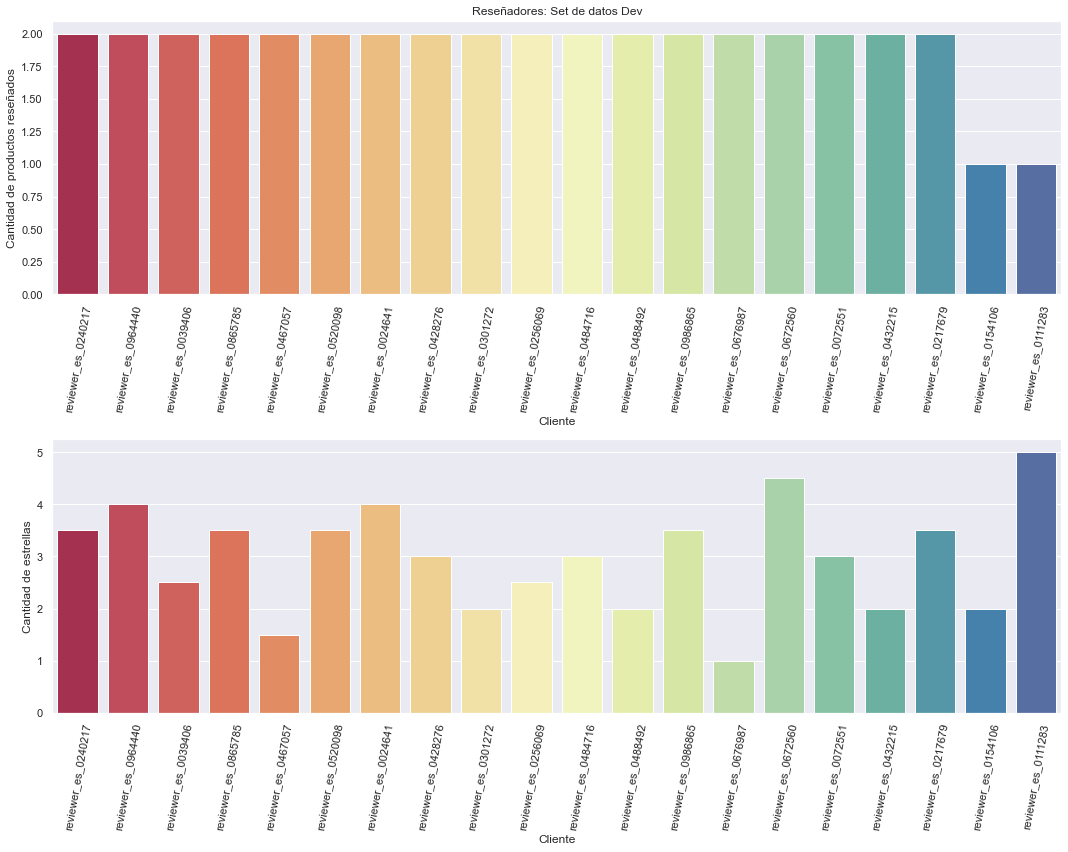

In [12]:
fig, axes = plt.subplots(2,1,figsize=(15, 12))
categoria_cliente = dev['reviewer_id'].value_counts()[:20];
promedio_estrellas = dev.loc[dev.reviewer_id.isin(categoria_cliente.index)].groupby("reviewer_id", as_index=False).mean()

sns.countplot(ax=axes[0], data=dev, x='reviewer_id', palette="Spectral", order=categoria_cliente.index)
axes[0].tick_params(axis='x', labelrotation= 80)
axes[0].set(xlabel='Cliente',ylabel='Cantidad de productos rese√±ados',title='Rese√±adores: Set de datos Dev')
sns.barplot(ax=axes[1], x = "reviewer_id", y = "stars", data = promedio_estrellas, palette="Spectral", order=categoria_cliente.index);
axes[1].tick_params(axis='x', labelrotation= 80)
axes[1].set(xlabel='Cliente',ylabel='Cantidad de estrellas')
plt.tight_layout();

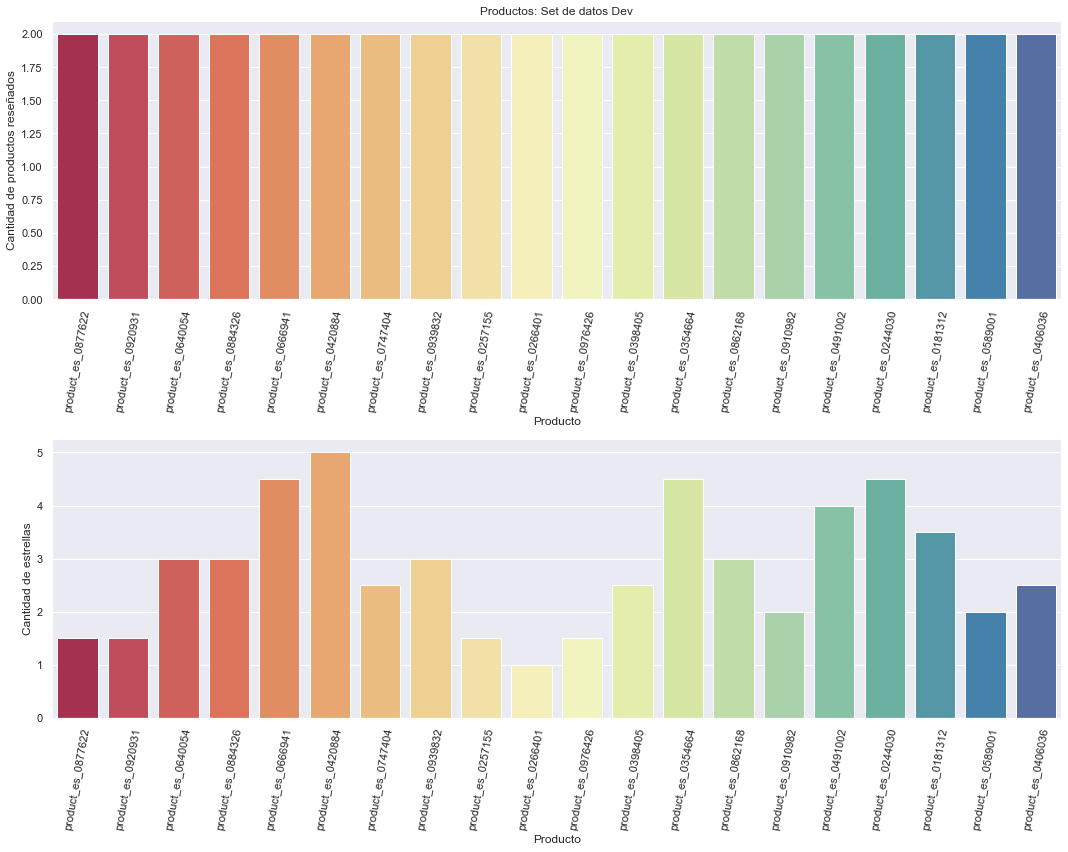

In [13]:
fig, axes = plt.subplots(2,1,figsize=(15, 12))
producto = dev['product_id'].value_counts()[:20];
promedio_estrellas = dev.loc[dev.product_id.isin(producto.index)].groupby("product_id", as_index=False).mean()

sns.countplot(ax=axes[0], data=dev, x='product_id', palette="Spectral", order=producto.index)
axes[0].tick_params(axis='x', labelrotation= 80)
axes[0].set(xlabel='Producto',ylabel='Cantidad de productos rese√±ados',title='Productos: Set de datos Dev')
sns.barplot(ax=axes[1], x = "product_id", y = "stars", data = promedio_estrellas, palette="Spectral", order=producto.index);
axes[1].tick_params(axis='x', labelrotation= 80)
axes[1].set(xlabel='Producto',ylabel='Cantidad de estrellas')
plt.tight_layout();

Como podemos ver, el tipo de producto no tiene un efecto muy fuerte en la puntuaci√≥n promedio de este, la categor√≠a mejor puntuada en promedio son los eBoooks, cuya calidad es est√°ndar y su puntuacion depende de cuanto le guste al comprador el contenido. Y el rese√±ador o el producto tampoco son muy relevantes, ya que ambos tienen frecuencia m√°xima de 2 instancias: no hay rese√±adores con alto volumen de rese√±as ni positivas ni negativas que podr√≠an afectar el modelo con maneras de escribir espec√≠ficas a una sola persona, ni productos con muchos reviews que podrian afectar el modelo con palabras espec√≠ficas a ese producto.

Verificamos la distribuci√≥n  de estrellas en los set de datos:

In [14]:
dis_stars = pt.PrettyTable()
dis_stars.add_column('Estrellas', [1,2,3,4,5])
dis_stars.add_column('set Dev', dev.stars.value_counts().tolist())
dis_stars.add_column('set Train', train.stars.value_counts().tolist())
dis_stars.add_column('set Test', test.stars.value_counts().tolist())
print(dis_stars)

+-----------+---------+-----------+----------+
| Estrellas | set Dev | set Train | set Test |
+-----------+---------+-----------+----------+
|     1     |   1000  |   40000   |   1000   |
|     2     |   1000  |   40000   |   1000   |
|     3     |   1000  |   40000   |   1000   |
|     4     |   1000  |   40000   |   1000   |
|     5     |   1000  |   40000   |   1000   |
+-----------+---------+-----------+----------+


Las etiquetas est√°n perfectamente distribuidas, indicando que las entradas del modelo van a estar balanceadas.

Finalmente, revisamos la cantidad de palabras que tienen los reviews:

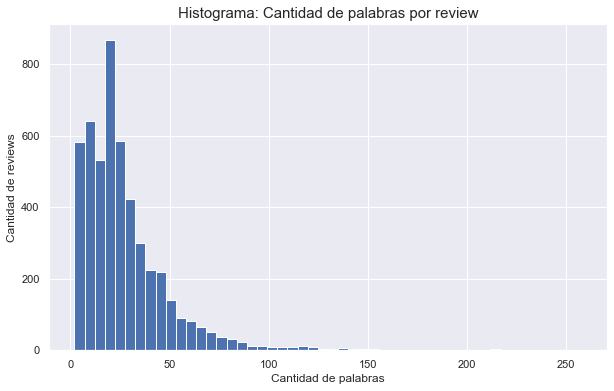

In [15]:
fig = plt.figure(figsize = (10,6))
ax = plt.axes()
words_per_review = dev.review_body.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 50)
ax.set(xlabel='Cantidad de palabras',ylabel='Cantidad de reviews')
plt.title('Histograma: Cantidad de palabras por review', fontsize=15);

In [16]:
print('La cantidad promedio de palabras por review es de:',words_per_review.mean())

La cantidad promedio de palabras por review es de: 27.572


# 2. Procesamiento de Lenguaje Natural

## 2.1. Pre-procesamiento de los datos

Con el fin de normalizar todos los datos para su evaluaci√≥n se aplica la funci√≥n *.lower* para que todos los car√°cteres est√©n en min√∫scula y evitar errores en los siguientes pasos.

In [9]:
for set in sets:
    set.review_body = set.review_body.apply(lambda x: x.lower())
    set.review_title = set.review_title.apply(lambda x: x.lower())

In [10]:
test.head()

review_id          product_id          reviewer_id  stars  \
0  es_0038754  product_es_0113523  reviewer_es_0580071      1   
1  es_0748979  product_es_0017036  reviewer_es_0819733      1   
2  es_0411746  product_es_0138642  reviewer_es_0508607      1   
3  es_0786686  product_es_0170887  reviewer_es_0491157      1   
4  es_0429700  product_es_0710642  reviewer_es_0008745      1   

                                         review_body  \
0  no me llego el articulo me lo mando por correo...   
1              la mensajer√≠a horrible, no compro mas   
2  estoy muy decepcionado con el vendedor ya que ...   
3  mi valoraci√≥n no es sobre el producto sino sob...   
4  pues ten√≠a inter√©s en este libro y prob√© la ve...   

                                review_title        product_category  
0                                no me llego                wireless  
1   amazon sigue sin cumplir en las entregas                    home  
2                         estafa en el env√≠o                     toy  
3                           estafa de amazon                    home  
4  no consegu√≠ pasar de la portada en kindle  digital_ebook_purchase

Clasificamos los reviews como positivos para los que tienen 4 o 5 estrellas y negativos para los que tienen 3, 2 o 1 estrella.

In [11]:
for set in sets:
    set['binario'] = np.where(set.stars > 3, 1, 0)
    print(set['binario'].value_counts())

0    3000
1    2000
Name: binario, dtype: int64
0    3000
1    2000
Name: binario, dtype: int64
0    120000
1     80000
Name: binario, dtype: int64


## 2.2 Tokenizaci√≥n

Transformamos los reviews mediante un tokenizado para evaluar los comentarios por palabra. Adicionalmente eliminamos caracteres especiales,signos de puntuaci√≥n, palabras mal escritas, n√∫meros y emojis.

In [8]:
def limpieza(dataset):

    characters_list = dataset.review_body.apply(lambda x: [each for each in x if not each.isalpha() and each != ' '])
    df_caracteres = []
    for i in range(len(characters_list)):
	    df_caracteres.append(characters_list[i])
    df_caracteres = [item for elem in df_caracteres for item in elem]
    print(np.unique(df_caracteres))

    for character in df_caracteres:
        dataset.review_body = dataset.review_body.apply(lambda x: x.replace(character, ' '))
        dataset.review_title = dataset.review_title.apply(lambda x: x.replace(character, ' '))

    return dataset.review_body, dataset.review_title

In [12]:
def limpieza2(dataset):

    characters_list = dataset.review_body.apply(lambda x: [each for each in x if not each.isalpha() and each != ' '])
    df_caracteres = []
    for i in range(len(characters_list)):
	    df_caracteres.append(characters_list[i])
    df_caracteres = [item for elem in df_caracteres for item in elem]

    sc = np.unique(df_caracteres)
    print(sc)
    dataset.review_body = dataset.review_body.apply(lambda x: ''.join([c for c in x if c not in sc]))
    print('Columna review_body')
    dataset.review_title = dataset.review_title.apply(lambda x: ''.join([c for c in x if c not in sc]))
    print('Columna review_title')
    
    return dataset.review_body, dataset.review_title

In [13]:
def tokenizar(df):

	new_df = df[['review_id','stars','binario','review_body','review_title']]

	new_df['body_token'] = new_df.review_body.apply(lambda x: nltk.tokenize.word_tokenize(x))
	new_df['title_token'] = new_df.review_title.apply(lambda x: nltk.tokenize.word_tokenize(x))
	print('Tokenizado')

	for column in ['body_token', 'title_token']:
		for i in range(len(new_df.body_token)):
			#new_df[column][i] = [word for word in new_df[column][i] if word not in characters]
			new_df[column][i] = [word for word in new_df[column][i] if word not in stopwords]
		print('Columna tokenizada')

	return new_df

In [14]:
dev.review_body, dev.review_title = limpieza2(dev)

['!' '"' '#' '%' "'" '(' ')' '*' '+' ',' '-' '.' '/' '0' '1' '2' '3' '4'
 '5' '6' '7' '8' '9' ':' ';' '<' '=' '>' '?' '_' '~' '¬°' '¬∞' '¬ø' '‚Äù' '‚Ä¶'
 '‚Ç¨' '‚ù§' 'Ô∏è' 'üòÇ' 'üòä' 'üòå' 'üòí' 'üòî' 'üò°' 'üò£' 'üò§' 'üò¨' 'üò≥' 'üôà' 'ü§î' 'ü§£']
Columna review_body
Columna review_title


In [15]:
dev

review_id          product_id          reviewer_id  stars  \
0     es_0417480  product_es_0873923  reviewer_es_0672978      1   
1     es_0180432  product_es_0713146  reviewer_es_0100858      1   
2     es_0144850  product_es_0356874  reviewer_es_0486447      1   
3     es_0339629  product_es_0939832  reviewer_es_0894703      1   
4     es_0858362  product_es_0489066  reviewer_es_0887663      1   
...          ...                 ...                  ...    ...   
4995  es_0179515  product_es_0158275  reviewer_es_0273644      5   
4996  es_0894902  product_es_0953259  reviewer_es_0153773      5   
4997  es_0760496  product_es_0731995  reviewer_es_0171091      5   
4998  es_0178380  product_es_0402051  reviewer_es_0686937      5   
4999  es_0810087  product_es_0684221  reviewer_es_0613091      5   

                                            review_body  \
0     malisimo muy grande demasiado aparatoso y mal ...   
1             no he recibido el pedido no la devoluci√≥n   
2     tengo que buscar otro sistema este no funciona...   
3     utilic√© las brocas de menor di√°metro y se me d...   
4            no me gusta su olor a viejo y aspecto malo   
...                                                 ...   
4995  me ha encantado la cesta ha llegado impecablet...   
4996                 desempe√±a su funci√≥n correctamente   
4997  me ha encantado la diadema las flores son tal ...   
4998  a mi me gustan mucho las fundas tpu ya que son...   
4999  el art√≠culo ha cumplido con las expectativas q...   

                            review_title  product_category  binario  
0                            mala compra          wireless        0  
1                      no lo he recibido           apparel        0  
2     que no aprieta bien en el manillar            sports        0  
3                  brocas de mantequilla  home_improvement        0  
4                            no me gusta            beauty        0  
...                                  ...               ...      ...  
4995                           guadalupe              home        1  
4996                      calidad precio            camera        1  
4997                           excelente               toy        1  
4998                              genial          wireless        1  
4999                       buena calidad           apparel        1  

[5000 rows x 8 columns]

In [16]:
dev_token = tokenizar(dev)

Tokenizado
Columna tokenizada
Columna tokenizada


Como resultado observamos que las columnas tokenizadas estan conformadas por listas de las palabras representativas de los comentarios, en min√∫sculas y sin signos de puntuaci√≥n:

In [17]:
dev_token.head()

review_id  stars  binario  \
0  es_0417480      1        0   
1  es_0180432      1        0   
2  es_0144850      1        0   
3  es_0339629      1        0   
4  es_0858362      1        0   

                                         review_body  \
0  malisimo muy grande demasiado aparatoso y mal ...   
1          no he recibido el pedido no la devoluci√≥n   
2  tengo que buscar otro sistema este no funciona...   
3  utilic√© las brocas de menor di√°metro y se me d...   
4         no me gusta su olor a viejo y aspecto malo   

                         review_title  \
0                         mala compra   
1                   no lo he recibido   
2  que no aprieta bien en el manillar   
3               brocas de mantequilla   
4                         no me gusta   

                                          body_token  \
0  [malisimo, grande, demasiado, aparatoso, mal, ...   
1             [no, recibido, pedido, no, devoluci√≥n]   
2  [buscar, sistema, no, funciona, bien, abrazade...   
3  [utilic√©, brocas, menor, di√°metro, doblaron, v...   
4            [no, gusta, olor, viejo, aspecto, malo]   

                     title_token  
0                 [mala, compra]  
1                 [no, recibido]  
2  [no, aprieta, bien, manillar]  
3          [brocas, mantequilla]  
4                    [no, gusta]

## 2.3 Lemmatizaci√≥n

Evaluamos la librer√≠a Spacy para realizar la lemmatizaci√≥n:

In [18]:
import spacy
#spacy.prefer_gpu()
nlp = spacy.load("es_core_news_sm")

In [19]:
Lemma_prueba = pd.DataFrame(columns = ['Token','Token Text','Token Pos', 'Token Lemma'])
dev_token['body_lemma'] = dev_token.body_token.apply(lambda x: ' '.join(x))
doc = nlp(dev_token['body_lemma'][2])
for token in doc:
    Lemma_prueba = Lemma_prueba.append({'Token':token, 'Token Text':token.text, 'Token Pos':token.pos_,
    'Token Lemma':token.lemma_}, ignore_index=True)
print(Lemma_prueba)

         Token  Token Text Token Pos Token Lemma
0       buscar      buscar      VERB      buscar
1      sistema     sistema      NOUN     sistema
2           no          no       ADV          no
3     funciona    funciona      VERB   funcionar
4         bien        bien       ADV        bien
5   abrazadera  abrazadera      NOUN  abrazadera
6        lleva       lleva      VERB      llevar
7      agarrar     agarrar      VERB     agarrar
8     manillar    manillar      VERB    manillar
9           no          no       ADV          no
10     aprieta     aprieta      VERB     apretar
11        bien        bien       ADV        bien
12  deslizando  deslizando      VERB    deslizar
13    linterna    linterna      VERB    linterna
14       hacia       hacia       ADP       hacia
15       abajo       abajo       ADV      abajar


In [20]:
dev_token['body_lemma'] = dev_token.body_lemma.apply(lambda y: [token.lemma_ for token in nlp(y)])
dev_token['title_lemma'] = dev_token.title_token.apply(lambda x: ' '.join(x))
dev_token['title_lemma'] = dev_token.title_lemma.apply(lambda y: [token.lemma_ for token in nlp(y)])

In [21]:
dev_token.head()

review_id  stars  binario  \
0  es_0417480      1        0   
1  es_0180432      1        0   
2  es_0144850      1        0   
3  es_0339629      1        0   
4  es_0858362      1        0   

                                         review_body  \
0  malisimo muy grande demasiado aparatoso y mal ...   
1          no he recibido el pedido no la devoluci√≥n   
2  tengo que buscar otro sistema este no funciona...   
3  utilic√© las brocas de menor di√°metro y se me d...   
4         no me gusta su olor a viejo y aspecto malo   

                         review_title  \
0                         mala compra   
1                   no lo he recibido   
2  que no aprieta bien en el manillar   
3               brocas de mantequilla   
4                         no me gusta   

                                          body_token  \
0  [malisimo, grande, demasiado, aparatoso, mal, ...   
1             [no, recibido, pedido, no, devoluci√≥n]   
2  [buscar, sistema, no, funciona, bien, abrazade...   
3  [utilic√©, brocas, menor, di√°metro, doblaron, v...   
4            [no, gusta, olor, viejo, aspecto, malo]   

                     title_token  \
0                 [mala, compra]   
1                 [no, recibido]   
2  [no, aprieta, bien, manillar]   
3          [brocas, mantequilla]   
4                    [no, gusta]   

                                          body_lemma  \
0  [malisimo, grande, demasiar, aparatoso, mal, p...   
1               [no, recibir, pedir, no, devoluci√≥n]   
2  [buscar, sistema, no, funcionar, bien, abrazad...   
3  [utilizar, broca, menor, di√°metro, doblar, var...   
4           [no, gustar, olor, viejo, aspecto, malo]   

                     title_lemma  
0                [malo, comprar]  
1                  [no, recibir]  
2  [no, apretar, bien, manillar]  
3           [broca, mantequilla]  
4                   [no, gustar]

## 2.4 An√°lisis de Frecuencia de las palabras

De acuerdo con el procesamiento anterior obtenemos una primera versi√≥n de la frecuencia de palabras que en general determinan si un comentario es positivo o negativo respecto a la clasficaci√≥n propuesta. Para analizar desarrollamos las gr√°ficas de frecuencia:

In [22]:
#Funci√≥n de frecuencias de las palabras
def get_freqs(df,columna,titulo):

	# Guardamos todos los titulos y rese√±as buenos y malos en listas separadas
	df_malos = df.loc[df.stars.isin([1,2,3])]
	df_buenos = df.loc[df.stars.isin([4,5])]
	df_malos.reset_index(inplace= True)
	df_buenos.reset_index(inplace= True)

	# Guardamos todos los titulos y rese√±as buenos y malos en listas separadas
	df_malos_lista = []
	for i in range(len(df_malos.review_title)):
		df_malos_lista.append(df_malos[columna][i])
	df_malos_lista = [item for elem in df_malos_lista for item in elem]

	df_buenos_lista = []
	for i in range(len(df_buenos.review_title)):
		df_buenos_lista.append(df_buenos[columna][i])
	df_buenos_lista = [item for elem in df_buenos_lista for item in elem]

	# Hacemos 4 dataframes con las frecuencias de las palabras
	df_malos_lista_freq = pd.DataFrame.from_dict(nltk.FreqDist(df_malos_lista), orient = 'index')
	df_malos_lista_freq['word'] = df_malos_lista_freq.index
	df_malos_lista_freq.sort_values(by = 0, ascending= False, inplace = True)

	df_buenos_lista_freq = pd.DataFrame.from_dict(nltk.FreqDist(df_buenos_lista), orient = 'index')
	df_buenos_lista_freq['word'] = df_buenos_lista_freq.index
	df_buenos_lista_freq.sort_values(by = 0, ascending= False, inplace = True)

	#Gr√°fica
	plt.figure(figsize= (8,4))
	plt.subplot(121)
	sns.barplot(x = df_malos_lista_freq[0][:10], y = df_malos_lista_freq.word[:10])
	plt.title(titulo + ': negativo')
	plt.xlabel('Cantidad')
	plt.subplot(122)
	sns.barplot(x = df_buenos_lista_freq[0][:10], y = df_buenos_lista_freq.word[:10])
	plt.title(titulo + ': positivo')
	plt.xlabel('Cantidad')
	plt.tight_layout();
	plt.show()

	return 

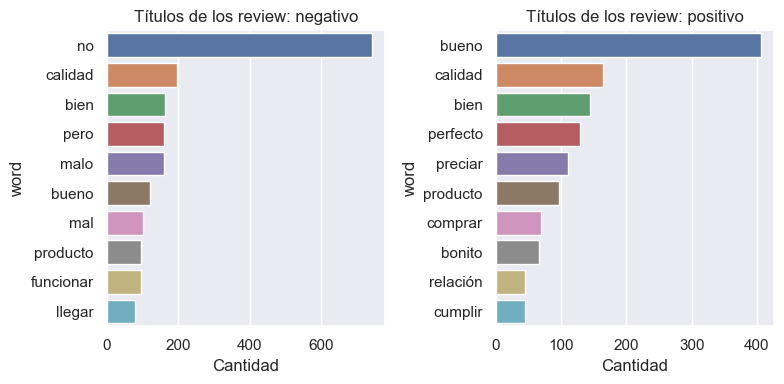

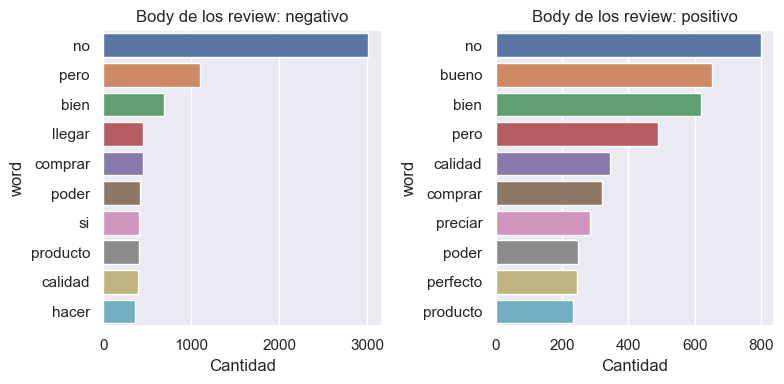

In [20]:
get_freqs(dev_token,'title_lemma','T√≠tulos de los review')
get_freqs(dev_token,'body_lemma','Body de los review')

Las gr√°ficas demuestran que hay muchas palabras que son muy comunes en todos los reviews y que se repiten tanto en los comentarios positivos como en los negativos como por ejemplo *calidad*, *producto* y *bien*. Por tanto, se decide eliminar algunas de las palabras m√°s repetidas en todos los comentarios para evaluar unicamente las palabras representativas que permitan realizar la clasificaci√≥n.

In [23]:
all_lemmas = []
for i in range(len(dev_token.body_lemma)):
	all_lemmas.append(dev_token.body_lemma[i])
all_lemmas = [item for elem in all_lemmas for item in elem]

one_percentile = int(len(np.unique(all_lemmas)) * 0.01)

#1% de las palabras m√°s comunes del dataset
from collections import Counter
count_freq = Counter(all_lemmas).most_common(one_percentile)
count_notfreq = Counter(all_lemmas).most_common()[-one_percentile:]

Del vector de palabras frecuentes se eliminan algunas que despu√©s de algunas pruebas se consideran fundamentales en le predicci√≥n.

In [24]:
a_remover = [word for word,val in count_freq] + [word for word,val in count_notfreq]
no_remover = ['bien', 'bueno','perfecto','malo','problema','tiempo','mal','encantar','perfectamente','no','mejor']
for i in no_remover:
    if i in a_remover:
        a_remover.remove(i)

In [25]:
#C√≥digo para remover las palabras
dev_token['title_lemma_rm'] = dev_token.title_lemma.apply(lambda x: [word for word in x if word not in a_remover])
dev_token['body_lemma_rm'] = dev_token.body_lemma.apply(lambda x: [word for word in x if word not in a_remover])

De forma que las nuevas gr√°ficas resultante son las siguientes:

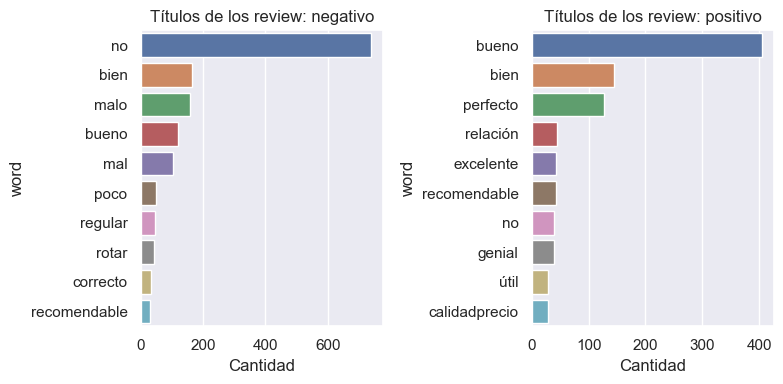

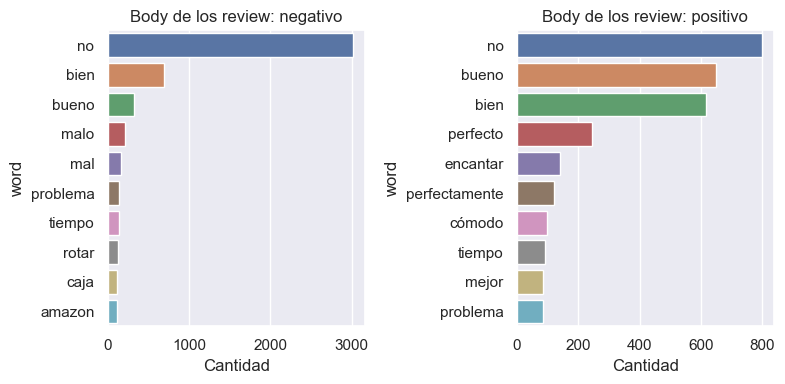

In [26]:
get_freqs(dev_token,'title_lemma_rm','T√≠tulos de los review')
get_freqs(dev_token,'body_lemma_rm','Body de los review')

Verificamos que se eliminan las palabras m√°s comunes que no aportaban informaci√≥n valiosa a la clasificaci√≥n y nos quedamos con palabras m√°s significativas como: *recomendable* o *√∫til* para comentarios positivos, y *defectuoso* o *devolver* para comentarios negativos. 

Sumaremos las palabras del titulo a las del cuerpo para tenerlas todas en un mismo feature. 

In [27]:
dev_token['words'] = dev_token['title_lemma'] + dev_token['body_lemma']
dev_token['words_rm'] = dev_token['title_lemma_rm'] + dev_token['body_lemma_rm']
dev_token.head()

review_id  stars  binario  \
0  es_0417480      1        0   
1  es_0180432      1        0   
2  es_0144850      1        0   
3  es_0339629      1        0   
4  es_0858362      1        0   

                                         review_body  \
0  malisimo muy grande demasiado aparatoso y mal ...   
1          no he recibido el pedido no la devoluci√≥n   
2  tengo que buscar otro sistema este no funciona...   
3  utilic√© las brocas de menor di√°metro y se me d...   
4         no me gusta su olor a viejo y aspecto malo   

                         review_title  \
0                         mala compra   
1                   no lo he recibido   
2  que no aprieta bien en el manillar   
3               brocas de mantequilla   
4                         no me gusta   

                                          body_token  \
0  [malisimo, grande, demasiado, aparatoso, mal, ...   
1             [no, recibido, pedido, no, devoluci√≥n]   
2  [buscar, sistema, no, funciona, bien, abrazade...   
3  [utilic√©, brocas, menor, di√°metro, doblaron, v...   
4            [no, gusta, olor, viejo, aspecto, malo]   

                     title_token  \
0                 [mala, compra]   
1                 [no, recibido]   
2  [no, aprieta, bien, manillar]   
3          [brocas, mantequilla]   
4                    [no, gusta]   

                                          body_lemma  \
0  [malisimo, grande, demasiar, aparatoso, mal, p...   
1               [no, recibir, pedir, no, devoluci√≥n]   
2  [buscar, sistema, no, funcionar, bien, abrazad...   
3  [utilizar, broca, menor, di√°metro, doblar, var...   
4           [no, gustar, olor, viejo, aspecto, malo]   

                     title_lemma                 title_lemma_rm  \
0                [malo, comprar]                         [malo]   
1                  [no, recibir]                  [no, recibir]   
2  [no, apretar, bien, manillar]  [no, apretar, bien, manillar]   
3           [broca, mantequilla]           [broca, mantequilla]   
4                   [no, gustar]                           [no]   

                                       body_lemma_rm  \
0              [malisimo, aparatoso, mal, protector]   
1                      [no, recibir, no, devoluci√≥n]   
2  [buscar, sistema, no, bien, abrazadera, agarra...   
3  [utilizar, broca, menor, di√°metro, doblar, var...   
4                   [no, olor, viejo, aspecto, malo]   

                                               words  \
0  [malo, comprar, malisimo, grande, demasiar, ap...   
1  [no, recibir, no, recibir, pedir, no, devoluci√≥n]   
2  [no, apretar, bien, manillar, buscar, sistema,...   
3  [broca, mantequilla, utilizar, broca, menor, d...   
4  [no, gustar, no, gustar, olor, viejo, aspecto,...   

                                            words_rm  
0        [malo, malisimo, aparatoso, mal, protector]  
1         [no, recibir, no, recibir, no, devoluci√≥n]  
2  [no, apretar, bien, manillar, buscar, sistema,...  
3  [broca, mantequilla, utilizar, broca, menor, d...  
4               [no, no, olor, viejo, aspecto, malo]

Con el dataset tokenizado, utilizaremos el t√≠tulo y cuerpo de los reviews para realizar modelos que los clasifiquen inicialmente de manera binaria, de forma que sea m√°s sencillo identificar errores y mejoras en la secci√≥n de pre-procesamiento y obtener el mejor modelo posible por clasificaci√≥n binaria como benchmark. Posteriormente continuaremos con los modelos de clasificaci√≥n para las 5 estrellas. 

Para lo anterior definimos las palabras como vectores usando la estrategia Bag of Words que guarda para cada entrada un vector donde todas las palabras del corpus son una variable y el numero que la funcion le asigna es las veces que aparece en la rese√±a particular.

Transformamos el dataset asi:

In [28]:
#dev_token = pd.read_csv('dataset_dev_token.csv')
data = dev_token[['words','words_rm','stars','binario']]
data['words_joint'] = data.words.apply(lambda x: ' '.join(x))
data['words_joint_rm'] = data.words_rm.apply(lambda x: ' '.join(x))

In [29]:
data.head()

words  \
0  [malo, comprar, malisimo, grande, demasiar, ap...   
1  [no, recibir, no, recibir, pedir, no, devoluci√≥n]   
2  [no, apretar, bien, manillar, buscar, sistema,...   
3  [broca, mantequilla, utilizar, broca, menor, d...   
4  [no, gustar, no, gustar, olor, viejo, aspecto,...   

                                            words_rm  stars  binario  \
0        [malo, malisimo, aparatoso, mal, protector]      1        0   
1         [no, recibir, no, recibir, no, devoluci√≥n]      1        0   
2  [no, apretar, bien, manillar, buscar, sistema,...      1        0   
3  [broca, mantequilla, utilizar, broca, menor, d...      1        0   
4               [no, no, olor, viejo, aspecto, malo]      1        0   

                                         words_joint  \
0  malo comprar malisimo grande demasiar aparatos...   
1          no recibir no recibir pedir no devoluci√≥n   
2  no apretar bien manillar buscar sistema no fun...   
3  broca mantequilla utilizar broca menor di√°metr...   
4        no gustar no gustar olor viejo aspecto malo   

                                      words_joint_rm  
0              malo malisimo aparatoso mal protector  
1                no recibir no recibir no devoluci√≥n  
2  no apretar bien manillar buscar sistema no bie...  
3  broca mantequilla utilizar broca menor di√°metr...  
4                      no no olor viejo aspecto malo

# 3. M√©tricas de Evaluaci√≥n


Definimos las m√©tricas de *accuracy, f1_score y matriz de confusi√≥n* para evaluar los modelos.

In [30]:
def error(nombre, modelo, X_train, y_train, X_test, y_test, y_pred):
    
    # Data Frame para guardar los resultados
    errores = pd.DataFrame(columns = ['Modelo','Accuracy','f1_score', 'VP', 'VN','FP', 'FN'])

    accuracy = accuracy_score(y_test, y_pred)
    f1_sco = f1_score(y_test, y_pred, average='binary')

    names= ["Positivo", "Negativo"]
    cm=confusion_matrix(y_test,y_pred)
    f,ax=plt.subplots(figsize=(4,4))
    sns.heatmap(cm,annot=True, fmt=".0f",ax=ax, cmap='Blues')
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    vn, fp, fn, vp = confusion_matrix(y_test, y_pred).ravel()
    errores = errores.append({'Modelo':nombre,'Accuracy':accuracy,'f1_score':f1_sco, 'VP':vp, 'VN':vn,'FP':fp, 'FN':fn},  ignore_index=True)

    return errores

In [31]:
def errores_reviews(y_test, y_pred, dev_token, columna):
    errores_pos = []
    errores_neg = []
    errores_total = []
    for i in range(1500):
        #print(y_test.iloc[i], y_pred[i])
        if y_test.iloc[i] != y_pred[i]:
            if y_test.iloc[i] == 0:
                errores_neg.append(y_test.index[i])
                errores_total.append(y_test.index[i])
            else:
                errores_pos.append(y_test.index[i])
                errores_total.append(y_test.index[i])
    datos_pos = dev_token.loc[dev_token.index.isin(errores_pos),['review_title','review_body',columna]]
    datos_neg = dev_token.loc[dev_token.index.isin(errores_neg),['review_title','review_body',columna]] 
    print('Errores por cantidad de estrellas:')
    print(dev_token.loc[errores_total].groupby('stars').words.count())
    return datos_pos, datos_neg

In [85]:
def error5(nombre, modelo, X_train, y_train, X_test, y_test, y_pred, dev_token):
    
    # Data Frame para guardar los resultados
    errores5 = pd.DataFrame(columns = ['Modelo','Accuracy','Errores 1','Errores 2','Errores 3','Errores 4','Errores 5'])
    accuracy = modelo.score(X_test,y_test)

    #names= y_train.unique().tolist()
    names= ["1","2","3","4","5"]
    cm=confusion_matrix(y_test,y_pred)
    f,ax=plt.subplots(figsize=(3,3))
    sns.heatmap(cm,annot=True,fmt=".0f",ax=ax, cmap='Blues')
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    errores_total = []
    for i in range(len(y_test)):
        #print(y_test.iloc[i], y_pred[i])
        if y_test.iloc[i] != y_pred[i]:
            errores_total.append(y_test.index[i])

    e_stars = dev_token.loc[errores_total].groupby('stars').words.count()

    errores5 = errores5.append({'Modelo':nombre,'Accuracy':accuracy,'Errores 1':e_stars.iloc[0],'Errores 2':e_stars.iloc[1],
    'Errores 3':e_stars.iloc[2],'Errores 4':e_stars.iloc[3],'Errores 5':e_stars.iloc[4]},  ignore_index=True)

    return errores5

# 4. Modelos de Machine Learning Binarios 

Ahora, a partir de los resultados procesados y organizados, procedemos a aplicar los modelos de Machine Learning para obtener la clasificaci√≥n y n√∫mero de estrellas por comentario.

Iniciaremos estableciendo como Benchmark el modelo que mejor clasifique los reviews de manera binaria: buenos o malos. Para esto evaluaremos un random forest y una regresi√≥n log√≠stica, utilizando el dataset tokenizado y la columna binario previamente establecida en la que 4 y 5 estrellas hacen un buen review y 1, 2 o 3 hacen uno malo.

## 4.1 Dataset Tokenizado

In [33]:
vectorizador=CountVectorizer(lowercase = False)

# Para los datos sin remover palabras
data_vec = vectorizador.fit_transform(data.words_joint)
X_data = data_vec.toarray()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_data, data['binario'], test_size = 0.3, random_state=42)

### 4.1.1 Random Forest Classifier

RandomForestClassifier(max_depth=45, n_estimators=200, random_state=42)


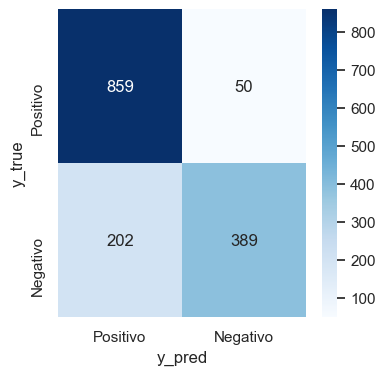

Modelo  Accuracy  f1_score   VP   VN  FP   FN
0  Random Forest Tokenizado     0.832   0.75534  389  859  50  202

In [35]:
#params = {'n_estimators': [50,100,150,200], 'max_depth': [10,15,30,45]}
params = {'n_estimators': [200],'max_depth': [45]}
rf = RandomForestClassifier(random_state=42)
rfo = GridSearchCV(rf, params)
rfo.fit(X_train,y_train)
print(rfo.best_estimator_)
best_rf = rfo.best_estimator_
y_pred = rfo.predict(X_test)

errores = error('Random Forest Tokenizado', best_rf, X_train, y_train, X_test, y_test, y_pred)
errores

**Evaluaci√≥n de los reviews mal predichos:**

In [36]:
datos_pos, datos_neg = errores_reviews(y_test, y_pred, dev_token, 'words_rm')

Errores por cantidad de estrellas:
stars
1      1
2      7
3     42
4    129
5     73
Name: words, dtype: int64


In [37]:
print('Reviews positivos calificados como negativos:')
datos_pos.head()

Reviews positivos calificados como negativos:


review_title  \
3006                                  bastante completo   
3007                          cobran mucho por el envio   
3017                                        su ligereza   
3024                   ocupa poco y la ranura es amplia   
3027  el frigor√≠fico es perfecto el color silver no ...   

                                            review_body  \
3006            no me gusta las instrucciones en ingles   
3007  llego bien pero el √∫ltimo d√≠a tardo casi una s...   
3017  que es muy ligero aunque un poco bajo y el ple...   
3024  la tengo hace menos de un mes y me gusta pero ...   
3027  el frigor√≠fico es perfecto el color silver no ...   

                                               words_rm  
3006                [completar, no, instrucci√≥n, ingle]  
3007  [cobrar, envio, bien, √∫ltimo, tardar, casi, se...  
3017  [ligereza, ligero, bajar, plegar, complicar, n...  
3024  [ocupar, ranurar, amplio, mes, creer, caro, re...  
3027  [frigor√≠fico, perfecto, color, silver, no, rea...

In [38]:
print('Reviews negativos calificados como positivos:')
datos_neg.head()

Reviews negativos calificados como positivos:


review_title  \
259                                   entrega tarde   
1023                             un poco disgustada   
1420                                           bien   
1557                                antonio aguilar   
1598  calidadprecio perfecto pero ha llegado da√±ado   

                                            review_body  \
259   producto perfecto entrega con seur nefastalleg...   
1023  estaba muy ilusionada porque a mi marido siemp...   
1420  es muy mono relaci√≥n calidad precio buena aunq...   
1557  el paquete es el que ped√≠ est√° en perfecto est...   
1598  el √°lbum genial en relaci√≥n calidadprecio pero...   

                                               words_rm  
259   [entregar, tardar, perfecto, entregar, seur, n...  
1023  [disgustar, ilusionar, maridar, siempre, zippo...  
1420     [bien, mono, relaci√≥n, bueno, no, maravilloso]  
1557  [antonio, aguilar, paquete, perfecto, fecho, e...  
1598  [calidadprecio, perfecto, da√±ar, √°lbum, genial...

A partir de este primer modelo y la revisi√≥n de los errores, identificamos las palabras a eliminar y mantener de la secci√≥n 2.4. Por ejemplo, obtuvimos mejores resultados manteniendo la palabra 'no' que quit√°ndola, manteniendo palabras como 'perfecto', 'mal y 'bueno' y eliminando palabras como 'pero'.

La mayor cantidad de errores de predicci√≥n se da en los reviews con 4 estrellas, ya que aunque los comentarios son buenos incluyen palabras de queja respecto a alg√∫n detalle que molest√≥ al cliente, y estas palabras son consideradas por el modelo como elementos negativos que clasifican en general el review como negativo.

In [49]:
# words_per_review_general = dev.review_body.apply(lambda x: len(x.split(' ')))
# words_per_review_malos = reviews_datos_neg.review_body.apply(lambda x: len(x.split(' ')))
# words_per_review_buenos = reviews_datos_pos.review_body.apply(lambda x: len(x.split(' ')))

In [50]:
# plt.figure(figsize = (10,6))
# sns.distplot(words_per_review_general, kde=True, label = 'General')
# sns.distplot(words_per_review_malos, kde=True, label = 'Negativos')
# sns.distplot(words_per_review_buenos, kde=True, label = 'Positivo')
# plt.legend()
# plt.title('¬øCantidad de palabras por review', fontsize=15);

La longitud de las reviews es muy similar en todo el corpus y en las que clasifica mal, no se puede afirmar que este sea un factor relevante

### 4.1.2 Regresi√≥n Log√≠stica

LogisticRegression(C=1, penalty='l1', solver='liblinear', tol=0.09)


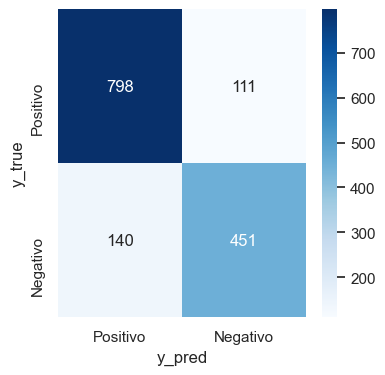

Modelo  Accuracy  f1_score   VP   VN   FP   FN
0        Random Forest Tokenizado  0.832000  0.755340  389  859   50  202
0  Regresi√≥n Log√≠stica Tokenizado  0.832667  0.782307  451  798  111  140

In [39]:
#params = {'penalty': ['l1', '‚Äòl2', 'elasticnet', 'none'],'tol': [0.01, 0.095, 0.09,0.08,0.07,0.06]}
params = {'penalty': ['l1'],'tol': [0.09]}

lr_model = GridSearchCV(LogisticRegression(C=1, solver="liblinear"), params)
lr_model.fit(X_train, y_train)

print(lr_model.best_estimator_)
best_lr = lr_model.best_estimator_
y_pred = lr_model.best_estimator_.predict(X_test)

errores = errores.append(error('Regresi√≥n Log√≠stica Tokenizado', best_lr, X_train, y_train, X_test, y_test, y_pred))
errores

In [40]:
datos_pos, datos_neg = errores_reviews(y_test, y_pred, dev_token, 'words_rm')

Errores por cantidad de estrellas:
stars
1     9
2    18
3    84
4    91
5    49
Name: words, dtype: int64


Miramos para estos dos predictores, los reviews que fueron dif√≠ciles de predecir para ambos. Desde ya vemos que 3 y 4 estrellas fueron los peor predichos en sus grupos respectivos para ambos modelos, pero que la mayoria de errores est√° en la categoria de buenos reviews. Exploramos m√°s a continuaci√≥n:

In [41]:
print('Reviews positivos calificados como negativos:')
datos_pos.head()

Reviews positivos calificados como negativos:


review_title  \
3006                       bastante completo   
3007               cobran mucho por el envio   
3017                             su ligereza   
3036  muy bonito pero tiene solo una hebilla   
3043                               divertido   

                                            review_body  \
3006            no me gusta las instrucciones en ingles   
3007  llego bien pero el √∫ltimo d√≠a tardo casi una s...   
3017  que es muy ligero aunque un poco bajo y el ple...   
3036  pone en la descripci√≥n que es de doble hebilla...   
3043  juego muy entretenido y educativo para toda fa...   

                                               words_rm  
3006                [completar, no, instrucci√≥n, ingle]  
3007  [cobrar, envio, bien, √∫ltimo, tardar, casi, se...  
3017  [ligereza, ligero, bajar, plegar, complicar, n...  
3036  [hebilla, descripci√≥n, doblar, hebilla, solame...  
3043  [divertir, jugar, entretener, educativo, todo,...

In [42]:
print('Reviews negativos calificados como positivos:')
datos_neg.head()

Reviews negativos calificados como positivos:


review_title  \
191          libro abandonado   
254                se levanta   
259             entrega tarde   
393  no es resistente al agua   
436                    fiasco   

                                           review_body  \
191                no he podido leerlo no es mi estilo   
254  de las  unidades ya he gastado  porque se leva...   
259  producto perfecto entrega con seur nefastalleg...   
393  he comprado este producto en el mes de febrero...   
436  me ha durado  d√≠as muy chulo y la idea es buen...   

                                              words_rm  
191       [librar, abandonar, no, leerlo, no, estilar]  
254  [levantar, unidad, gastar, levantar, seguir, i...  
259  [entregar, tardar, perfecto, entregar, seur, n...  
393  [no, resistente, aguar, mes, febrero, mojarse,...  
436             [fiasco, chulo, ideo, bueno, horrible]

Observamos que estos reviews empiezan hablando de positivos antes de luego decir lo que no les gust√≥ del producto. Si la parte positiva del review tiene mayor extensi√≥n que la negativa, ser√° muy dificil que el modelo lo clasifique bien. 

### 4.1.3 Complement Naive Bayes

El modelo multinomial Naive Bayes trabaja sobre datasets con varios labels, y  es uno de los tipos de modelo basado en Naive Bayes que se usan clasicamenTe en problemas de clasificaci√≥n de texto con vecTorizacioned del tipo Bag of Words. Una modificaci√≥n de este que ha probado tener mejores resultados consistentemente es el modelo Complement Naive Bayes, optimizado para datasets desbalanceados.

Como este √∫ltimo no es nuestro caso, no podemos elegir uno de estos dos modelos sin probarlos ambos, lo hacemos a continuaci√≥n: 

ComplementNB(alpha=1.7)


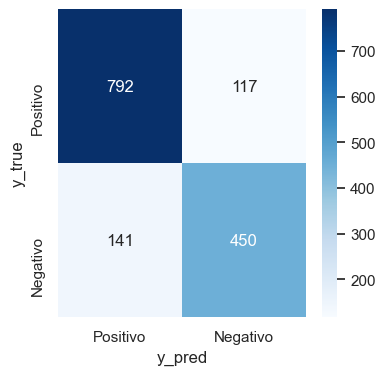

Modelo  Accuracy  f1_score   VP   VN   FP   FN
0             Random Forest Tokenizado  0.832000  0.755340  389  859   50  202
0       Regresi√≥n Log√≠stica Tokenizado  0.832667  0.782307  451  798  111  140
0  Naive Bayes ComplementNB Tokenizado  0.828000  0.777202  450  792  117  141

In [43]:
#params = {'alpha': [1.4, 1.5, 1.6, 1.7, 1.8, 1.9], 'norm': [True, False]}
params = {'alpha': [1.7], 'norm': [True, False]}
cnb_model = GridSearchCV(ComplementNB(), params)
cnb_model.fit(X_train, y_train)
cnb_model = cnb_model.best_estimator_
print(cnb_model)
y_pred = cnb_model.predict(X_test)

errores = errores.append(error('Naive Bayes ComplementNB Tokenizado', cnb_model, X_train, y_train, X_test, y_test, y_pred))
errores

## 4.2 Dataset tokenizado con palabras removidas

In [52]:
vectorizador=CountVectorizer(lowercase = False)

# Para los datos con palabras removidas
data_vec = vectorizador.fit_transform(data.words_joint_rm)
X_data_rm = data_vec.toarray()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_data_rm, data['binario'], test_size = 0.3, random_state=42)

### 4.2.1 Random Forest Classifier

RandomForestClassifier(max_depth=45, n_estimators=200, random_state=42)


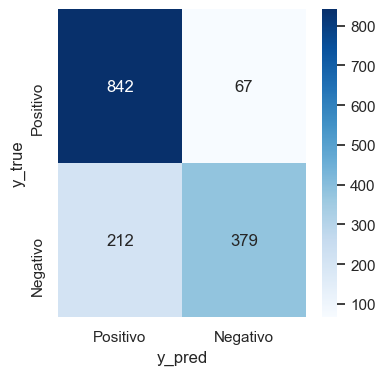

Modelo  Accuracy  f1_score   VP   VN   FP   FN
0             Random Forest Tokenizado  0.832000  0.755340  389  859   50  202
0       Regresi√≥n Log√≠stica Tokenizado  0.832667  0.782307  451  798  111  140
0  Naive Bayes ComplementNB Tokenizado  0.828000  0.777202  450  792  117  141
0              Random Forest Removidas  0.814000  0.730955  379  842   67  212

In [46]:
#params = {'n_estimators': [50,,100,150,200], 'max_depth': [10,,15,30,45]}
params = {'n_estimators': [200],'max_depth': [45]}
rf = RandomForestClassifier(random_state=42)
rfo = GridSearchCV(rf, params)
rfo.fit(X_train,y_train)
print(rfo.best_estimator_)
best_rf = rfo.best_estimator_
y_pred = rfo.predict(X_test)

errores = errores.append(error('Random Forest Removidas', best_rf, X_train, y_train, X_test, y_test, y_pred))
errores

### 4.2.2 Regresi√≥n Log√≠stica

LogisticRegression(C=1, penalty='l1', solver='liblinear', tol=0.09)


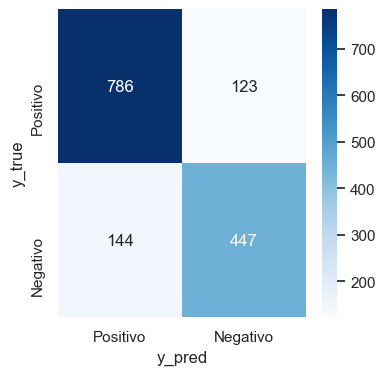

Modelo  Accuracy  f1_score   VP   VN   FP   FN
0             Random Forest Tokenizado  0.832000  0.755340  389  859   50  202
0       Regresi√≥n Log√≠stica Tokenizado  0.832667  0.782307  451  798  111  140
0  Naive Bayes ComplementNB Tokenizado  0.828000  0.777202  450  792  117  141
0              Random Forest Removidas  0.814000  0.730955  379  842   67  212
0        Regresi√≥n Log√≠stica Removidas  0.822667  0.771084  448  786  123  143
0   Naive Bayes ComplementNB Removidas  0.824667  0.771503  444  793  116  147
0                Random Forest Bigrama  0.654000  0.248915   86  895   14  505
0        Regresi√≥n Log√≠stica Removidas  0.824000  0.773585  451  785  124  140
0        Regresi√≥n Log√≠stica Removidas  0.822000  0.770026  447  786  123  144

In [55]:
#params = {'penalty': ['l1', '‚Äòl2', 'elasticnet', 'none'],'tol': [0.06,0.07,0.08,0.09,0.095,0.01]}
params = {'penalty': ['l1'],'tol': [0.09]}

lr_model = GridSearchCV(LogisticRegression(C=1, solver="liblinear"), params)
lr_model.fit(X_train, y_train)
print(lr_model.best_estimator_)
best_lr = lr_model.best_estimator_
y_pred = lr_model.best_estimator_.predict(X_test)

errores = errores.append(error('Regresi√≥n Log√≠stica Removidas', best_lr, X_train, y_train, X_test, y_test, y_pred))
errores

### 4.2.3 Naive Bayes Complement NB

ComplementNB(alpha=2.3)


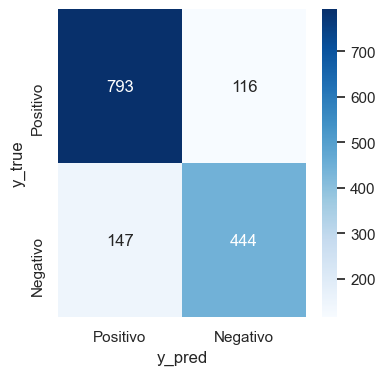

Modelo  Accuracy  f1_score   VP   VN   FP   FN
0             Random Forest Tokenizado  0.832000  0.755340  389  859   50  202
0       Regresi√≥n Log√≠stica Tokenizado  0.832667  0.782307  451  798  111  140
0  Naive Bayes ComplementNB Tokenizado  0.828000  0.777202  450  792  117  141
0              Random Forest Removidas  0.814000  0.730955  379  842   67  212
0        Regresi√≥n Log√≠stica Removidas  0.822667  0.771084  448  786  123  143
0   Naive Bayes ComplementNB Removidas  0.824667  0.771503  444  793  116  147

In [48]:
#params = {'alpha': [2.1, 2.2, 2.3, 2.4, 2.5], 'norm': [True, False]}
params = {'alpha': [2.3], 'norm': [True, False]}
		  
cnb_model = GridSearchCV(ComplementNB(), params)
cnb_model.fit(X_train, y_train)
cnb_model = cnb_model.best_estimator_
print(cnb_model)
y_pred = cnb_model.predict(X_test)

errores = errores.append(error('Naive Bayes ComplementNB Removidas', cnb_model, X_train, y_train, X_test, y_test, y_pred))
errores

## 4.3 Bigramas

Sabemos que el mejor modelo para tokens √∫nicos es un Logistic Regressor con Accuracy de alrededor del 81%, intentaremos mejorar sobre este benchmark usando estos mismos modelos con bigramas en vez de unigramas.

In [56]:
# Generamos el dataset con los bigramas
new_vec = CountVectorizer(analyzer='word', ngram_range=(2, 2))
new_data_vec = new_vec.fit_transform(data.words_joint)
X_data_bi = new_data_vec.toarray()

# Tomamos los bigramas unicos
all_bigrams = new_vec.get_feature_names()
print(len(all_bigrams))

52909


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_data_bi, data['binario'], test_size = 0.3, random_state=42)

### 4.3.1 Random Forest

RandomForestClassifier(max_depth=45, n_estimators=200, random_state=42)


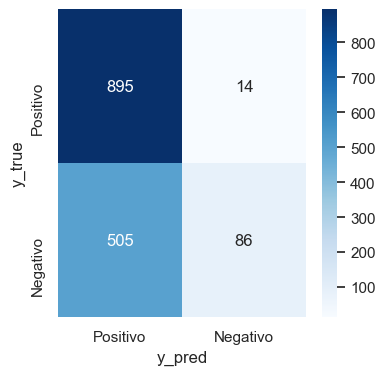

Modelo  Accuracy  f1_score   VP   VN   FP   FN
0             Random Forest Tokenizado  0.832000  0.755340  389  859   50  202
0       Regresi√≥n Log√≠stica Tokenizado  0.832667  0.782307  451  798  111  140
0  Naive Bayes ComplementNB Tokenizado  0.828000  0.777202  450  792  117  141
0              Random Forest Removidas  0.814000  0.730955  379  842   67  212
0        Regresi√≥n Log√≠stica Removidas  0.822667  0.771084  448  786  123  143
0   Naive Bayes ComplementNB Removidas  0.824667  0.771503  444  793  116  147
0                Random Forest Bigrama  0.654000  0.248915   86  895   14  505
0        Regresi√≥n Log√≠stica Removidas  0.824000  0.773585  451  785  124  140
0        Regresi√≥n Log√≠stica Removidas  0.822000  0.770026  447  786  123  144
0                Random Forest Bigrama  0.654000  0.248915   86  895   14  505

In [58]:
# Utilizamos el mejor estimador Random Forest, con esta nueva data
params = {'n_estimators': [200],'max_depth': [45]}
rf = RandomForestClassifier(random_state=42)
rfo = GridSearchCV(rf, params)
rfo.fit(X_train,y_train)
print(rfo.best_estimator_)
best_rf = rfo.best_estimator_
y_pred = rfo.predict(X_test)

errores = errores.append(error('Random Forest Bigrama', best_rf, X_train, y_train, X_test, y_test, y_pred))
errores

### 4.3.2. Regresi√≥n Log√≠stica

LogisticRegression(C=1, penalty='l1', solver='liblinear', tol=0.01)


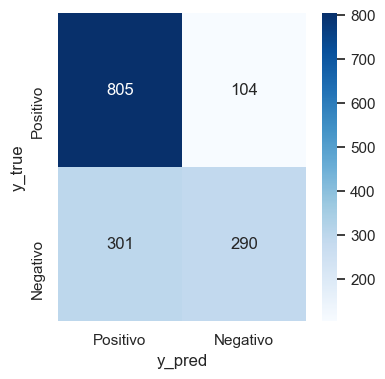

Modelo  Accuracy  f1_score   VP   VN   FP   FN
0             Random Forest Tokenizado  0.832000  0.755340  389  859   50  202
0       Regresi√≥n Log√≠stica Tokenizado  0.832667  0.782307  451  798  111  140
0  Naive Bayes ComplementNB Tokenizado  0.828000  0.777202  450  792  117  141
0              Random Forest Removidas  0.814000  0.730955  379  842   67  212
0        Regresi√≥n Log√≠stica Removidas  0.822667  0.771084  448  786  123  143
0   Naive Bayes ComplementNB Removidas  0.824667  0.771503  444  793  116  147
0                Random Forest Bigrama  0.654000  0.248915   86  895   14  505
0        Regresi√≥n Log√≠stica Removidas  0.824000  0.773585  451  785  124  140
0        Regresi√≥n Log√≠stica Removidas  0.822000  0.770026  447  786  123  144
0                Random Forest Bigrama  0.654000  0.248915   86  895   14  505
0          Regresi√≥n Log√≠stica Bigrama  0.730000  0.588832  290  805  104  301

In [59]:
params = {'penalty': ['l1'],'tol': [0.01]}
lr_model = GridSearchCV(LogisticRegression(C=1, solver="liblinear"), params)
lr_model.fit(X_train, y_train)
print(lr_model.best_estimator_)
best_lr = lr_model.best_estimator_
y_pred = lr_model.best_estimator_.predict(X_test)

errores = errores.append(error('Regresi√≥n Log√≠stica Bigrama', best_lr, X_train, y_train, X_test, y_test, y_pred))
errores

### 4.3.3 Complement Naive Bayes Complement

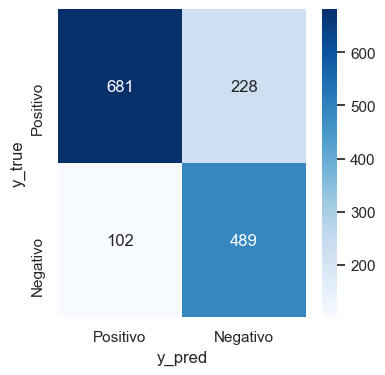

Modelo  Accuracy  f1_score   VP   VN   FP   FN
0             Random Forest Tokenizado  0.832000  0.755340  389  859   50  202
0       Regresi√≥n Log√≠stica Tokenizado  0.832667  0.782307  451  798  111  140
0  Naive Bayes ComplementNB Tokenizado  0.828000  0.777202  450  792  117  141
0              Random Forest Removidas  0.814000  0.730955  379  842   67  212
0        Regresi√≥n Log√≠stica Removidas  0.822667  0.771084  448  786  123  143
0   Naive Bayes ComplementNB Removidas  0.824667  0.771503  444  793  116  147
0                Random Forest Bigrama  0.654000  0.248915   86  895   14  505
0        Regresi√≥n Log√≠stica Removidas  0.824000  0.773585  451  785  124  140
0        Regresi√≥n Log√≠stica Removidas  0.822000  0.770026  447  786  123  144
0                Random Forest Bigrama  0.654000  0.248915   86  895   14  505
0          Regresi√≥n Log√≠stica Bigrama  0.730000  0.588832  290  805  104  301
0     Naive Bayes ComplementNB Binario  0.780000  0.747706  489  681  228  102

In [60]:
#params = {'alpha': [2.8, 2, 2.1, 2.2, 2.3, 2.4, 2.5], 'norm': [True, False]}
params = {'alpha': [2.8], 'norm': [True, False]}	  
cnb_model = GridSearchCV(ComplementNB(), params)
cnb_model.fit(X_train, y_train)
cnb_model = cnb_model.best_estimator_
y_pred = cnb_model.predict(X_test)

errores = errores.append(error('Naive Bayes ComplementNB Bigrama', cnb_model, X_train, y_train, X_test, y_test, y_pred))
errores

## 4.4 Dataset con bigrama afirmativo y negativo

Con base en los resultados anteriores, consideramos como mejora al dataset: mantener los datos lemmatizados sin remover las palabras m√°s frecuentes, pero unir las palabras 'no' con la siguiente palabra tokenizada, de forma que obtengamos palabras como; 'nollegar', 'nofuncionar', 'nogustar'.

In [61]:
data['words_no'] = data['words_joint'].apply(lambda x: re.sub('^no\s',' no',x))
data['words_no'] = data['words_no'].apply(lambda x: re.sub('\sno\s',' no',x))
data['words_no'] = data['words_no'].apply(lambda x: re.sub('^si\s',' si',x))
data['words_no'] = data['words_no'].apply(lambda x: re.sub('\ssi\s',' si',x))

In [62]:
vectorizador=CountVectorizer(lowercase = False)
# Para los datos sin remover palabras
data_vec_no = vectorizador.fit_transform(data.words_no)
X_data_no = data_vec_no.toarray()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_data_no, data['binario'], test_size = 0.3, random_state=42)

### 4.4.1 Random Forest

RandomForestClassifier(max_depth=45, n_estimators=200, random_state=42)


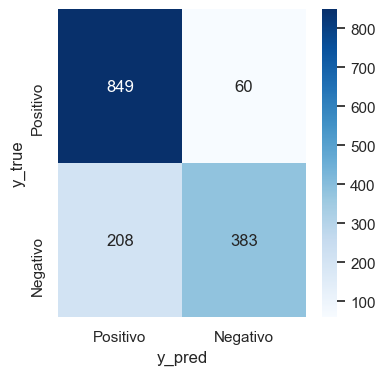

Modelo  Accuracy  f1_score   VP   VN   FP   FN
0             Random Forest Tokenizado  0.832000  0.755340  389  859   50  202
0       Regresi√≥n Log√≠stica Tokenizado  0.832667  0.782307  451  798  111  140
0  Naive Bayes ComplementNB Tokenizado  0.828000  0.777202  450  792  117  141
0              Random Forest Removidas  0.814000  0.730955  379  842   67  212
0        Regresi√≥n Log√≠stica Removidas  0.822667  0.771084  448  786  123  143
0   Naive Bayes ComplementNB Removidas  0.824667  0.771503  444  793  116  147
0                Random Forest Bigrama  0.654000  0.248915   86  895   14  505
0        Regresi√≥n Log√≠stica Removidas  0.824000  0.773585  451  785  124  140
0        Regresi√≥n Log√≠stica Removidas  0.822000  0.770026  447  786  123  144
0                Random Forest Bigrama  0.654000  0.248915   86  895   14  505
0          Regresi√≥n Log√≠stica Bigrama  0.730000  0.588832  290  805  104  301
0     Naive Bayes ComplementNB Binario  0.780000  0.747706  489  681  228  102
0          Random Forest Bigrama Si/No  0.821333  0.740812  383  849   60  208

In [64]:
#params = {'n_estimators': [50,,100,150,200], 'max_depth': [10,,15,30,45]}
params = {'n_estimators': [200],'max_depth': [45]}
rf = RandomForestClassifier(random_state=42)
rfo = GridSearchCV(rf, params)
rfo.fit(X_train,y_train)
print(rfo.best_estimator_)
best_rf = rfo.best_estimator_
y_pred = rfo.predict(X_test)
errores = errores.append(error('Random Forest Bigrama Si/No', best_rf, X_train, y_train, X_test, y_test, y_pred))
errores

### 4.4.2 Regresi√≥n Log√≠stica

LogisticRegression(C=1, penalty='l1', solver='liblinear', tol=0.07)


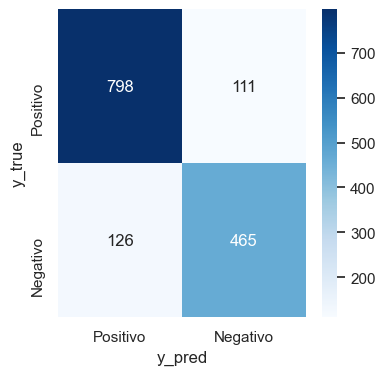

Modelo  Accuracy  f1_score   VP   VN   FP   FN
0             Random Forest Tokenizado  0.832000  0.755340  389  859   50  202
0       Regresi√≥n Log√≠stica Tokenizado  0.832667  0.782307  451  798  111  140
0  Naive Bayes ComplementNB Tokenizado  0.828000  0.777202  450  792  117  141
0              Random Forest Removidas  0.814000  0.730955  379  842   67  212
0        Regresi√≥n Log√≠stica Removidas  0.822667  0.771084  448  786  123  143
0   Naive Bayes ComplementNB Removidas  0.824667  0.771503  444  793  116  147
0                Random Forest Bigrama  0.654000  0.248915   86  895   14  505
0        Regresi√≥n Log√≠stica Removidas  0.824000  0.773585  451  785  124  140
0        Regresi√≥n Log√≠stica Removidas  0.822000  0.770026  447  786  123  144
0                Random Forest Bigrama  0.654000  0.248915   86  895   14  505
0          Regresi√≥n Log√≠stica Bigrama  0.730000  0.588832  290  805  104  301
0     Naive Bayes ComplementNB Binario  0.780000  0.747706  489  681  228  102
0          Random Forest Bigrama Si/No  0.821333  0.740812  383  849   60  208
0    Regresi√≥n Log√≠stica Bigrama Si/No  0.842000  0.796915  465  798  111  126

In [65]:
#params = {'penalty': ['l1', '‚Äòl2', 'elasticnet', 'none'],'tol': [0.08, 0.07, 0.0,6, 0.05, 0.04, 0.03, 0.02]}
params = {'penalty': ['l1'],'tol': [0.07]}
lr_model = GridSearchCV(LogisticRegression(C=1, solver="liblinear"), params)
lr_model.fit(X_train, y_train)
print(lr_model.best_estimator_)
best_lr = lr_model.best_estimator_
y_pred = lr_model.best_estimator_.predict(X_test)
errores = errores.append(error('Regresi√≥n Log√≠stica Bigrama Si/No', best_lr, X_train, y_train, X_test, y_test, y_pred))
errores

### 4.3.3 Naive Bayes Complement NB

ComplementNB(alpha=1.7)


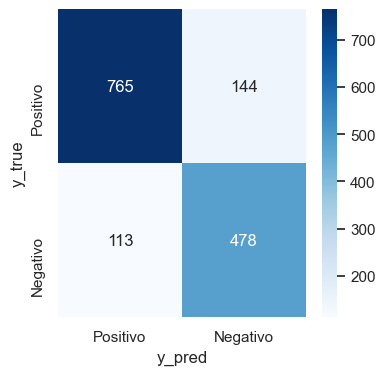

Modelo  Accuracy  f1_score   VP   VN   FP  \
0                Random Forest Tokenizado  0.832000  0.755340  389  859   50   
0          Regresi√≥n Log√≠stica Tokenizado  0.832667  0.782307  451  798  111   
0     Naive Bayes ComplementNB Tokenizado  0.828000  0.777202  450  792  117   
0                 Random Forest Removidas  0.814000  0.730955  379  842   67   
0           Regresi√≥n Log√≠stica Removidas  0.822667  0.771084  448  786  123   
0      Naive Bayes ComplementNB Removidas  0.824667  0.771503  444  793  116   
0                   Random Forest Bigrama  0.654000  0.248915   86  895   14   
0           Regresi√≥n Log√≠stica Removidas  0.824000  0.773585  451  785  124   
0           Regresi√≥n Log√≠stica Removidas  0.822000  0.770026  447  786  123   
0                   Random Forest Bigrama  0.654000  0.248915   86  895   14   
0             Regresi√≥n Log√≠stica Bigrama  0.730000  0.588832  290  805  104   
0        Naive Bayes ComplementNB Binario  0.780000  0.747706  489  681  228   
0             Random Forest Bigrama Si/No  0.821333  0.740812  383  849   60   
0       Regresi√≥n Log√≠stica Bigrama Si/No  0.842000  0.796915  465  798  111   
0  Naive Bayes ComplementNB Bigrama Si/No  0.828667  0.788129  478  765  144   

    FN  
0  202  
0  140  
0  141  
0  212  
0  143  
0  147  
0  505  
0  140  
0  144  
0  505  
0  301  
0  102  
0  208  
0  126  
0  113

In [66]:
#params = {'alpha': [1.3, 1.4, 1.5, 1.6, 1.7, 1.8],'norm': [True, False]}
params = {'alpha': [1.7],'norm': [True, False]}

cnb_model = GridSearchCV(ComplementNB(), params)
cnb_model.fit(X_train, y_train)
cnb_model = cnb_model.best_estimator_
print(cnb_model)
y_pred = cnb_model.predict(X_test)

errores = errores.append(error('Naive Bayes ComplementNB Bigrama Si/No', cnb_model, X_train, y_train, X_test, y_test, y_pred))
errores

A partir de todos los resultados, datasets y modelos, se aplicaron diferentes t√©cnicas para conseguir mejorar las m√©tricas de los modelos, desde el tokenizado, la organizaci√≥n de las palabras, la lemmatizaci√≥n y los par√°metros; de forma que logramos pasar de accuracy de alrededor de 0.65 hasta el mayor accuracy conseguido de 0.84. El modelo con mejores resultados, tanto en el *Accuracy* como en el *f1_score* es la regresi√≥n log√≠stica con el dataset editado con bigramas para las expresiones con la palabra 'no', demostrando que es uno de los mejores modelos espec√≠ficamente para datos binarios. 

Para continuar, es necesario aplicar los modelos que predecir la clasificaci√≥n de las 5 estrellas.

# 5. Modelos de Clasificaci√≥n de 5 estrellas

A partir de los resultados obtenidos en la clasificaci√≥n binaria y las correcciones aplicadas al preprocesamiento de datos, procedemos a iniciar con los modelos de clasificaci√≥n para las 5 estrellas. Empleamos varios modelos diferentes para poder comparar resultados.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_data_no, data['stars'], test_size = 0.3, random_state=42)

## 5.1 Naive Bayes Complement

ComplementNB(alpha=1.8, norm=True)


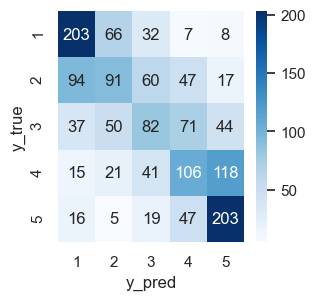

Modelo  Accuracy Errores 1 Errores 2 Errores 3  \
0  Naive Bayes ComplementNB Estrellas  0.456667       113       218       202   

  Errores 4 Errores 5  
0       195        87

In [91]:
#params = {'alpha': [1.6, 1.7, 1.8, 1.9, 2, 2.2, 2.5],'norm': [True, False]}
params = {'alpha': [1.8],'norm': [True, False]}

cnb_model = GridSearchCV(ComplementNB(), params)
cnb_model.fit(X_train, y_train)
cnb_model = cnb_model.best_estimator_
print(cnb_model)
y_pred = cnb_model.predict(X_test)
errores5 = error5('Naive Bayes ComplementNB Estrellas', cnb_model, X_train, y_train, X_test, y_test, y_pred, dev_token)
errores5

## 5.2 Random Forest

RandomForestClassifier(max_depth=13, n_estimators=200)


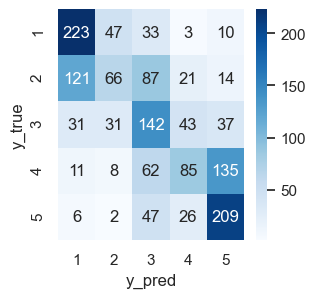

Modelo  Accuracy Errores 1 Errores 2 Errores 3  \
0  Naive Bayes ComplementNB Estrellas  0.456667       113       218       202   
0             Random Forest Estrellas  0.483333        93       243       142   

  Errores 4 Errores 5  
0       195        87  
0       216        81

In [92]:
#params = {'n_estimators': [10, 25, 50, 100, 200],'max_depth': [11,13,15,17]}
params = {'n_estimators': [200],'max_depth': [13]}
rf = GridSearchCV(RandomForestClassifier(), params)
rf.fit(X_train, y_train)
rfo = rf.best_estimator_
print(rfo)
y_pred = rfo.predict(X_test)

errores5 = errores5.append(error5('Random Forest Estrellas', rf, X_train, y_train, X_test, y_test, y_pred, dev_token))
errores5

## 5.3 Ridge Classifier

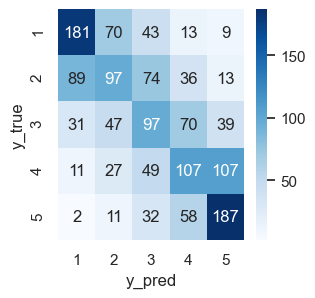

Modelo  Accuracy Errores 1 Errores 2 Errores 3  \
0  Naive Bayes ComplementNB Estrellas  0.456667       113       218       202   
0             Random Forest Estrellas  0.483333        93       243       142   
0                     Ridge Estrellas  0.446000       135       212       187   

  Errores 4 Errores 5  
0       195        87  
0       216        81  
0       194       103

In [93]:
#Generaci√≥n del modelo lineal
ridge = RidgeClassifier(solver='sag', tol=0.01)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
errores5 = errores5.append(error5('Ridge Estrellas', ridge, X_train, y_train, X_test, y_test, y_pred, dev_token))
errores5

## 5.4 Kneighbors Classifier

KNeighborsClassifier(n_neighbors=18)


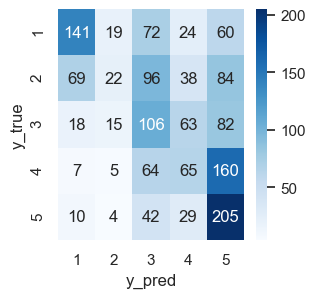

Modelo  Accuracy Errores 1 Errores 2 Errores 3  \
0  Naive Bayes ComplementNB Estrellas  0.456667       113       218       202   
0             Random Forest Estrellas  0.483333        93       243       142   
0                     Ridge Estrellas  0.446000       135       212       187   
0                       KNN Estrellas  0.349333       176       289       183   
0                       KNN Estrellas  0.359333       175       287       178   
0                       KNN Estrellas  0.359333       175       287       178   

  Errores 4 Errores 5  
0       195        87  
0       216        81  
0       194       103  
0       244        84  
0       236        85  
0       236        85

In [96]:
params = {'n_neighbors' : [16,17,18,19,20,21]}
neigh = GridSearchCV(KNeighborsClassifier(), params)
neigh.fit(X_train, y_train)
neigho = neigh.best_estimator_
print(neigho)
y_pred = neigho.predict(X_test)
errores5 = errores5.append(error5('KNN Estrellas', neigh, X_train, y_train, X_test, y_test, y_pred, dev_token))
errores5

## 5.5 Nearest Centroid

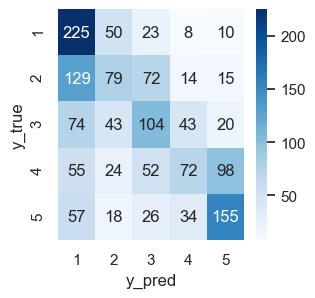

Modelo  Accuracy Errores 1 Errores 2 Errores 3  \
0  Naive Bayes ComplementNB Estrellas  0.456667       113       218       202   
0             Random Forest Estrellas  0.483333        93       243       142   
0                     Ridge Estrellas  0.446000       135       212       187   
0                       KNN Estrellas  0.349333       176       289       183   
0                       KNN Estrellas  0.359333       175       287       178   
0                       KNN Estrellas  0.359333       175       287       178   
0          Nearest Centroid Estrellas  0.423333        91       230       180   

  Errores 4 Errores 5  
0       195        87  
0       216        81  
0       194       103  
0       244        84  
0       236        85  
0       236        85  
0       229       135

In [97]:
centroid = NearestCentroid()
centroid.fit(X_train, y_train)
y_pred = centroid.predict(X_test)
errores5 = errores5.append(error5('Nearest Centroid Estrellas', centroid, X_train, y_train, X_test, y_test, y_pred, dev_token))
errores5

## 5.6 Passive Aggressive Classifier

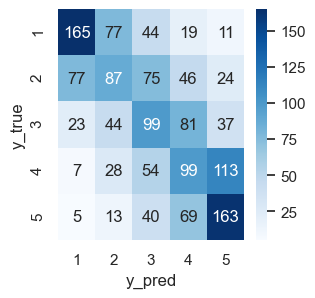

Modelo  Accuracy Errores 1 Errores 2  \
0      Naive Bayes ComplementNB Estrellas  0.456667       113       218   
0                 Random Forest Estrellas  0.483333        93       243   
0                         Ridge Estrellas  0.446000       135       212   
0                           KNN Estrellas  0.349333       176       289   
0                           KNN Estrellas  0.359333       175       287   
0                           KNN Estrellas  0.359333       175       287   
0              Nearest Centroid Estrellas  0.423333        91       230   
0  Passive Agressive Classifier Estrellas  0.408667       151       222   

  Errores 3 Errores 4 Errores 5  
0       202       195        87  
0       142       216        81  
0       187       194       103  
0       183       244        84  
0       178       236        85  
0       178       236        85  
0       180       229       135  
0       185       202       127

In [98]:
pac = PassiveAggressiveClassifier()
pac.fit(X_train, y_train)
y_pred = pac.predict(X_test)

errores5 = errores5.append(error5('Passive Agressive Classifier Estrellas', pac, X_train, y_train, X_test, y_test, y_pred, dev_token))
errores5

In [ ]:
params = {'penalty' : ['l2','l1','elasticnet'],
		  'alpha' : [0.0001, 0.001, 0.01, 0.1]}
perceptron = GridSearchCV(Perceptron(), params)
perceptron.fit(X_train, y_train)
perceptron = perceptron.best_estimator_
y_pred = perceptron.predict(X_test)

errores5 = errores5.append(error5('Perceptron Estrellas', perceptron, X_train, y_train, X_test, y_test, y_pred, dev_token))
errores5

In [ ]:
#Se demor√≥ 2.1k segundos .
params = {'penalty' : ['l2','l1','elasticnet'],
		  'alpha' : [0.0001, 0.001, 0.01, 0.1]}
sgd = GridSearchCV(SGDClassifier(), params)
sgd.fit(X_train, y_train)
sgd = sgd.best_estimator_
y_pred = sgd.predict(X_test)

errores5 = errores5.append(error5('SGDClassifier Estrellas', sgd, X_train, y_train, X_test, y_test, y_pred, dev_token))
errores5

En general, observamos que la mayor cantidad de errores para todos los modelos es para los comentarios con 2 y 4 estrellas, seguramente debido a que pueden confundirse con comentarios muy malos de 1 estrella o muy buenos de 5 estrellas.

El modelo con mejores resultados es el Random Forest con 0.48 de accuracy, 3 d√©cimas mayor al segundo puesto que es el modelo de Naive Bayes ComplementNB.

# 6. Modelo Final

## 6.1. Preprocesamiento del dataset Train

In [166]:
mini_train = train.sample(20000)
mini_train.reset_index(inplace = True)
mini_train.stars.value_counts()

4    4058
5    4037
1    3976
3    3966
2    3963
Name: stars, dtype: int64

In [167]:
mini_train.review_body, mini_train.review_title = limpieza2(mini_train)

['!' '"' '#' '$' '%' '&' "'" '(' ')' '*' '+' ',' '-' '.' '/' '0' '1' '2'
 '3' '4' '5' '6' '7' '8' '9' ':' ';' '<' '=' '>' '?' '[' ']' '^' '_' '`'
 '{' '¬°' '¬∞' '¬ø' '√ó' '\u200d' '‚Äú' '‚Äù' '‚Ä¶' '‚Ç¨' '‚òπ' '‚ò∫' '‚ôÄ' '‚ù§' 'Ô∏è' '\ufeff'
 'üèª' 'üèº' 'üëã' 'üëå' 'üëç' 'üëé' 'üòÅ' 'üòÇ' 'üòÑ' 'üòÖ' 'üòâ' 'üòä' 'üòå' 'üòç' 'üòè' 'üòí' 'üòî' 'üòï'
 'üòñ' 'üòû' 'üò†' 'üò°' 'üò¢' 'üò£' 'üò•' 'üò¨' 'üò≠' 'ü§î' 'ü§£' 'ü§¶' 'ü§®' 'ü§Æ' 'ü•∞']
Columna review_body
Columna review_title


In [168]:
train_token = tokenizar(mini_train)
train_token.head()

Tokenizado
Columna tokenizada
Columna tokenizada


review_id  stars  binario  \
0  es_0784550      5        1   
1  es_0076344      3        0   
2  es_0204940      2        0   
3  es_0218147      3        0   
4  es_0530087      4        1   

                                         review_body            review_title  \
0  sennheiser es buena marca adem√°s duran mucho m...  lo mejor a este precio   
1  no he descubierto grandes novedades que no hic...             ni fu ni fa   
2  pensaba por los comentarios que vendr√≠an las b...   no es lo que esperaba   
3  son poco peque√±as tengo unas nimbus en el mism...                peque√±as   
4  el fabricante solicita una factura de la compr...                garantia   

                                          body_token      title_token  
0  [sennheiser, buena, marca, adem√°s, duran, auri...  [mejor, precio]  
1  [no, descubierto, grandes, novedades, no, hici...         [fu, fa]  
2  [pensaba, comentarios, vendr√≠an, boquillas, pl...   [no, esperaba]  
3  [peque√±as, unas, nimbus, mismo, n√∫mero, media,...       [peque√±as]  
4  [fabricante, solicita, factura, compra, garant...       [garantia]

In [169]:
def lemmatizar(dataset):
    dataset['body_lemma'] = dataset.body_token.apply(lambda x: ' '.join(x))
    dataset['body_lemma'] = dataset.body_lemma.apply(lambda y: [token.lemma_ for token in nlp(y)])
    print('Body lematizado')
    dataset['title_lemma'] = dataset.title_token.apply(lambda x: ' '.join(x))
    dataset['title_lemma'] = dataset.title_lemma.apply(lambda y: [token.lemma_ for token in nlp(y)])
    print('Title lematizado')

    return dataset

In [170]:
train_token = lemmatizar(train_token)
train_token.head()

Body lematizado
Title lematizado


review_id  stars  binario  \
0  es_0784550      5        1   
1  es_0076344      3        0   
2  es_0204940      2        0   
3  es_0218147      3        0   
4  es_0530087      4        1   

                                         review_body            review_title  \
0  sennheiser es buena marca adem√°s duran mucho m...  lo mejor a este precio   
1  no he descubierto grandes novedades que no hic...             ni fu ni fa   
2  pensaba por los comentarios que vendr√≠an las b...   no es lo que esperaba   
3  son poco peque√±as tengo unas nimbus en el mism...                peque√±as   
4  el fabricante solicita una factura de la compr...                garantia   

                                          body_token      title_token  \
0  [sennheiser, buena, marca, adem√°s, duran, auri...  [mejor, precio]   
1  [no, descubierto, grandes, novedades, no, hici...         [fu, fa]   
2  [pensaba, comentarios, vendr√≠an, boquillas, pl...   [no, esperaba]   
3  [peque√±as, unas, nimbus, mismo, n√∫mero, media,...       [peque√±as]   
4  [fabricante, solicita, factura, compra, garant...       [garantia]   

                                          body_lemma       title_lemma  
0  [sennheiser, bueno, marcar, adem√°s, durar, aur...  [mejor, preciar]  
1  [no, descubrir, grande, novedad, no, hacer, ad...          [fu, fa]  
2  [pensar, comentario, venir, boquilla, pl√°stico...     [no, esperar]  
3  [peque√±o, uno, nimbus, mismo, n√∫mero, medio, t...         [peque√±o]  
4  [fabricante, solicitar, facturar, comprar, gar...        [garantia]

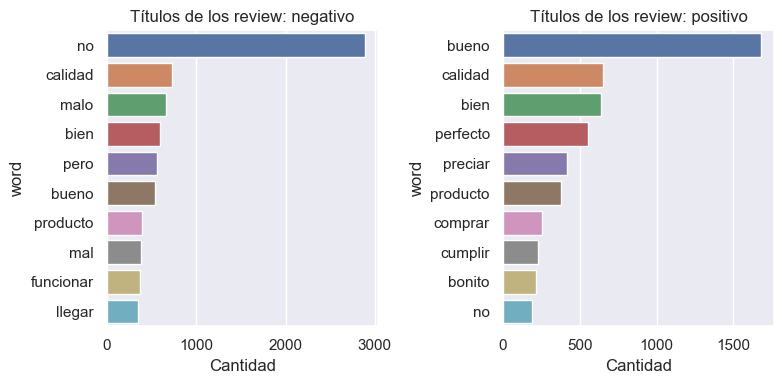

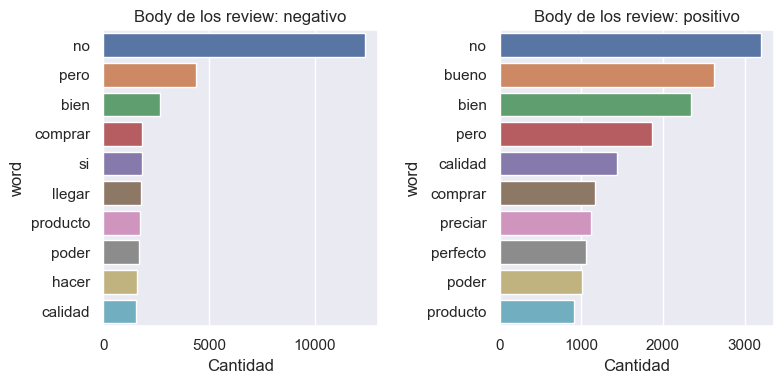

In [171]:
get_freqs(train_token,'title_lemma','T√≠tulos de los review')
get_freqs(train_token,'body_lemma','Body de los review')

In [172]:
train_token['words'] = train_token['title_lemma'] + train_token['body_lemma']
train_token = train_token[['words','stars','binario']]
train_token['words_joint'] = train_token.words.apply(lambda x: ' '.join(x))

In [173]:
train_token['words_no'] = train_token['words_joint'].apply(lambda x: re.sub('^no\s',' no',x))
train_token['words_no'] = train_token['words_no'].apply(lambda x: re.sub('\sno\s',' no',x))
train_token['words_no'] = train_token['words_no'].apply(lambda x: re.sub('^si\s',' si',x))
train_token['words_no'] = train_token['words_no'].apply(lambda x: re.sub('\ssi\s',' si',x))

## 6.2 Preprocesamiento del dataset Test

In [174]:
test.review_body, test.review_title = limpieza2(test)
test_token = tokenizar(test)
test_token.head()

[]
Columna review_body
Columna review_title
Tokenizado
Columna tokenizada
Columna tokenizada


review_id  stars  binario  \
0  es_0038754      1        0   
1  es_0748979      1        0   
2  es_0411746      1        0   
3  es_0786686      1        0   
4  es_0429700      1        0   

                                         review_body  \
0  no me llego el articulo me lo mando por correo...   
1               la mensajer√≠a horrible no compro mas   
2  estoy muy decepcionado con el vendedor ya que ...   
3  mi valoraci√≥n no es sobre el producto sino sob...   
4  pues ten√≠a inter√©s en este libro y prob√© la ve...   

                                review_title  \
0                                no me llego   
1   amazon sigue sin cumplir en las entregas   
2                         estafa en el env√≠o   
3                           estafa de amazon   
4  no consegu√≠ pasar de la portada en kindle   

                                          body_token  \
0  [no, llego, articulo, mando, correos, normal, ...   
1            [mensajer√≠a, horrible, no, compro, mas]   
2  [decepcionado, vendedor, pedido, no, lleg√≥, ti...   
3  [valoraci√≥n, no, producto, sino, amazon, ofrec...   
4  [pues, inter√©s, libro, prob√©, versi√≥n, kindle,...   

                              title_token  
0                             [no, llego]  
1      [amazon, sigue, cumplir, entregas]  
2                         [estafa, env√≠o]  
3                        [estafa, amazon]  
4  [no, consegu√≠, pasar, portada, kindle]

In [175]:
test_token = lemmatizar(test_token)
test_token.head()

Body lematizado
Title lematizado


review_id  stars  binario  \
0  es_0038754      1        0   
1  es_0748979      1        0   
2  es_0411746      1        0   
3  es_0786686      1        0   
4  es_0429700      1        0   

                                         review_body  \
0  no me llego el articulo me lo mando por correo...   
1               la mensajer√≠a horrible no compro mas   
2  estoy muy decepcionado con el vendedor ya que ...   
3  mi valoraci√≥n no es sobre el producto sino sob...   
4  pues ten√≠a inter√©s en este libro y prob√© la ve...   

                                review_title  \
0                                no me llego   
1   amazon sigue sin cumplir en las entregas   
2                         estafa en el env√≠o   
3                           estafa de amazon   
4  no consegu√≠ pasar de la portada en kindle   

                                          body_token  \
0  [no, llego, articulo, mando, correos, normal, ...   
1            [mensajer√≠a, horrible, no, compro, mas]   
2  [decepcionado, vendedor, pedido, no, lleg√≥, ti...   
3  [valoraci√≥n, no, producto, sino, amazon, ofrec...   
4  [pues, inter√©s, libro, prob√©, versi√≥n, kindle,...   

                              title_token  \
0                             [no, llego]   
1      [amazon, sigue, cumplir, entregas]   
2                         [estafa, env√≠o]   
3                        [estafa, amazon]   
4  [no, consegu√≠, pasar, portada, kindle]   

                                          body_lemma  \
0  [no, llegar, articular, mandar, correo, normal...   
1           [mensajer√≠a, horrible, no, comprar, mas]   
2  [decepcionar, vendedor, pedir, no, llegar, tie...   
3  [valoraci√≥n, no, producto, sino, amazon, ofrec...   
4  [pues, inter√©s, librar, probar, versi√≥n, kindl...   

                              title_lemma  
0                            [no, llegar]  
1     [amazon, seguir, cumplir, entregar]  
2                       [estafar, enviar]  
3                       [estafar, amazon]  
4  [no, conseguir, pasar, portar, kindle]

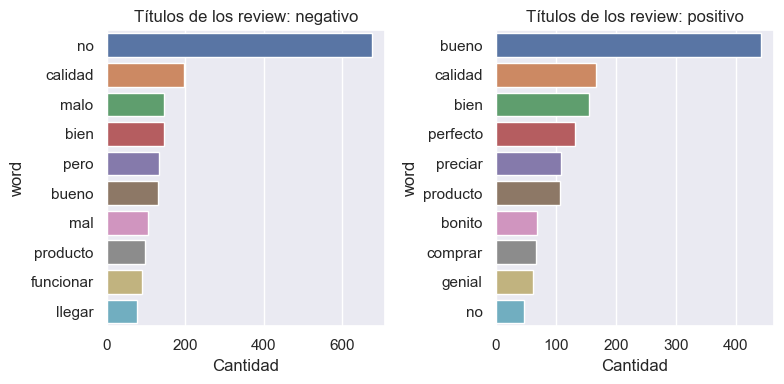

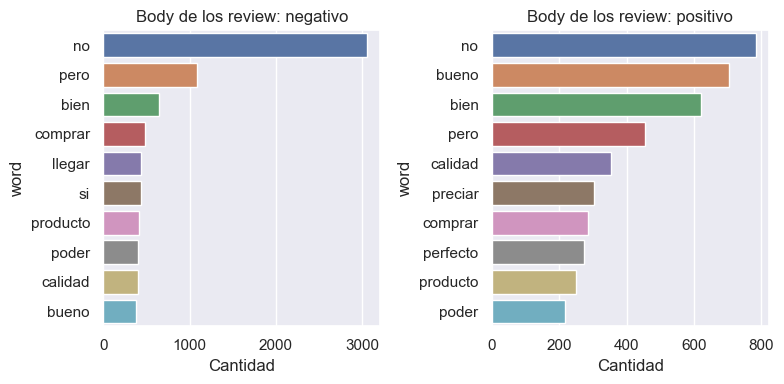

In [176]:
get_freqs(test_token,'title_lemma','T√≠tulos de los review')
get_freqs(test_token,'body_lemma','Body de los review')

In [177]:
test_token['words'] = test_token['title_lemma'] + test_token['body_lemma']
test_token = test_token[['words','stars','binario']]
test_token['words_joint'] = test_token.words.apply(lambda x: ' '.join(x))

In [178]:
test_token['words_no'] = test_token['words_joint'].apply(lambda x: re.sub('^no\s',' no',x))
test_token['words_no'] = test_token['words_no'].apply(lambda x: re.sub('\sno\s',' no',x))
test_token['words_no'] = test_token['words_no'].apply(lambda x: re.sub('^si\s',' si',x))
test_token['words_no'] = test_token['words_no'].apply(lambda x: re.sub('\ssi\s',' si',x))

In [179]:
train_token

words  stars  binario  \
0      [mejor, preciar, sennheiser, bueno, marcar, ad...      5        1   
1      [fu, fa, no, descubrir, grande, novedad, no, h...      3        0   
2      [no, esperar, pensar, comentario, venir, boqui...      2        0   
3      [peque√±o, peque√±o, uno, nimbus, mismo, n√∫mero,...      3        0   
4      [garantia, fabricante, solicitar, facturar, co...      4        1   
...                                                  ...    ...      ...   
19995  [manuel, villalba, tal, describir, bueno, comp...      5        1   
19996                      [mas, no, gustar, entretener]      2        0   
19997  [faltar, filtrar, malo, suerte, venir, filtrar...      2        0   
19998  [librar, lectura, valenciano, Ôªø1, lugar, indic...      4        1   
19999  [cumplir, prop√≥sito, boyar, completamente, est...      4        1   

                                             words_joint  \
0      mejor preciar sennheiser bueno marcar adem√°s d...   
1      fu fa no descubrir grande novedad no hacer ade...   
2      no esperar pensar comentario venir boquilla pl...   
3      peque√±o peque√±o uno nimbus mismo n√∫mero medio ...   
4      garantia fabricante solicitar facturar comprar...   
...                                                  ...   
19995  manuel villalba tal describir bueno comprar in...   
19996                           mas no gustar entretener   
19997  faltar filtrar malo suerte venir filtrar combu...   
19998  librar lectura valenciano Ôªø1 lugar indicar pet...   
19999  cumplir prop√≥sito boyar completamente estanco ...   

                                                words_no  
0      mejor preciar sennheiser bueno marcar adem√°s d...  
1      fu fa nodescubrir grande novedad nohacer adema...  
2       noesperar pensar comentario venir boquilla pl...  
3      peque√±o peque√±o uno nimbus mismo n√∫mero medio ...  
4      garantia fabricante solicitar facturar comprar...  
...                                                  ...  
19995  manuel villalba tal describir bueno comprar in...  
19996                            mas nogustar entretener  
19997  faltar filtrar malo suerte venir filtrar combu...  
19998  librar lectura valenciano Ôªø1 lugar indicar pet...  
19999  cumplir prop√≥sito boyar completamente estanco ...  

[20000 rows x 5 columns]

In [180]:
data = pd.concat([train_token.words_no, test_token.words_no])

In [181]:
# Series de resultados y
ybin = mini_train.binario
ystars = mini_train.stars
ybin_test = test_token.binario
ystars_test = test_token.stars

## 6.3 Modelo de Machine Learning Binario

In [182]:
vectorizador = CountVectorizer(lowercase = False)
vec = vectorizador.fit_transform(data)
whole_thing = vec.toarray()
X_train_data = whole_thing[:20000]
X_test_data = whole_thing[-5000:]

LogisticRegression(C=1, penalty='l1', solver='liblinear', tol=0.09)


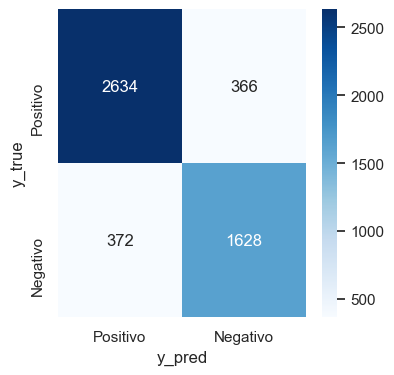

Modelo  Accuracy  f1_score    VP    VN  \
0  Validaci√≥n binaria: Regresi√≥n Log√≠stica    0.8524  0.815223  1628  2634   

    FP   FN  
0  366  372

In [183]:
#params = {'penalty': ['l1', '‚Äòl2', 'elasticnet', 'none'],'tol': [0-07,0.08,0.09,0.1,0.11]}
params = {'penalty': ['l1'],'tol': [0.09]}
lr_model = GridSearchCV(LogisticRegression(C=1, solver="liblinear"), params)
lr_model.fit(X_train_data, ybin)
print(lr_model.best_estimator_)
best_lr = lr_model.best_estimator_
y_pred = lr_model.best_estimator_.predict(X_test_data)
errores_val = error('Validaci√≥n binaria: Regresi√≥n Log√≠stica', best_lr, X_train_data, ybin, X_test_data, ybin_test, y_pred)
errores_val

### 6.4 Modelo de Clasificaci√≥n de estrellas

RandomForestClassifier(max_depth=12, n_estimators=200)


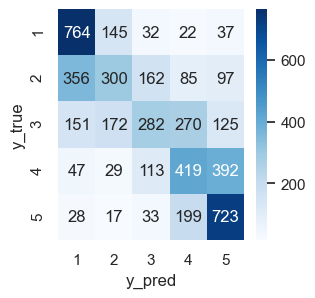

Modelo  Accuracy Errores 1 Errores 2 Errores 3  \
0  Random Forest Estrellas Validation    0.4976       503       470       499   

  Errores 4 Errores 5  
0       544       496

In [184]:
params = {'n_estimators': [200], 'max_depth': [12,13,14]}
rf = GridSearchCV(RandomForestClassifier(), params)
rf.fit(X_train_data, ystars)
rfo = rf.best_estimator_
print(rfo)
y_pred = rfo.predict(X_test_data)
errores_val = error5('Random Forest Estrellas Validation', rfo, X_train_data, ystars, X_test_data, ystars_test, y_pred, train_token)
errores_val